## CodeSignal and Code Institute challenges
- [Bits and pieces](#Bits-and-pieces)

## banknoteDispenser
The National Bank wants the ATM to dispense any requested amount using the minimum number of banknotes, assuming that the supply of banknotes of each denomination is unlimited. Help the National Bank to solve this problem. 

The program must take `2` arguments. The first argument of the input contains an array with `n` different natural numbers $x_1$, $x_2$, ..., $x_n$, not exceeding `1.000.000`. The second argument must take a natural number `S` not exceeding `5.000.000`.
The program must find the representation of the number `S` as a sum of terms from the set {$x_i$} containing the minimum number of terms and display this representation on the screen. If there are several such representations, the program must display any (one) of them. If such a representation does not exist, then the program should print the sentence **this amount cannot be issued**.

**Examples**

|banknote denominations|sum to be dispensed|issued notes|
|:-|:-|:-|
|1 3 7 12 32 |40 |1 7 32
|10 50 100 500 1000 |99 |this amount cannot be issued 
|1 7 20 50 |89 |1 1 1 1 1 7 7 20 50


#### first solution with `while` loop and comments

In [1]:
function banknoteDispenser(notes,sum){
  dispense = [];
  // there is no promise that the "arr" is sorted in any way, so let's sort it for the algorithm to work
  // descending order, so the exit criteria can address the first element of "notes"
  notes = notes.sort((a,b)=>a>b);
  // start from the highest denominated note
  let i = notes.length-1;
  // do until the leftover dispensable amount is not less than the smallest denomination
  while (sum>=notes[0]){
    // how many notes needed from the actual note
    const count = Math.floor(sum/notes[i]);
    // add "count" number of notes from the actual note to the solution
    if (count>0) dispense = Array(count).fill(notes[i]).concat(dispense);
    // decrease the sum to be dispensed
    sum = sum % notes[i];
    // take next note
    i--;
  }
  // is the leftover amount decreased to 0, we have a solution, otherwise not
  return (sum===0) ? dispense : "this amount cannot be issued";
}

// test cases
[ banknoteDispenser([1, 3, 7, 12, 32], 40),         // expected [1, 7, 32]
  banknoteDispenser([10, 50, 100, 500, 1000], 99),  // expected "this amount cannot be issued"
  banknoteDispenser([1, 7, 20, 50], 89) ]           // expected [1, 1, 1, 1, 1, 7, 7, 20, 50]

[ [ 1, 7, 32 ],
  'this amount cannot be issued',
  [ 1, 1, 1, 1, 1, 7, 7, 20, 50 ] ]

#### second, (functional) solution, derived from first

In [2]:
function banknoteDispenser(notes,sum){
  const issue = notes.sort((a,b)=>a<b).reduce((disp,note,i,arr)=>(disp = Array(sum/note|0).fill(note).concat(disp), sum=sum%note, disp),[]);
  return (sum===0) ? issue : "this amount cannot be issued";
}

// test cases
[ banknoteDispenser([1, 3, 7, 12, 32], 40),         // expected [1, 7, 32]
  banknoteDispenser([10, 50, 100, 500, 1000], 99),  // expected "this amount cannot be issued"
  banknoteDispenser([1, 7, 20, 50], 89) ]           // expected [1, 1, 1, 1, 1, 7, 7, 20, 50]

[ [ 1, 7, 32 ],
  'this amount cannot be issued',
  [ 1, 1, 1, 1, 1, 7, 7, 20, 50 ] ]

this second solution sacrifices
- the early exit when the `sum` decreases below of the smallest denomination
- the decision on to append (`concat`) the dispensable notes if the current note can not be used

Also there are 2 lines within the function `banknoteDispenser`, so I am not sure if the code still classifies as functional. Anyway, removing the need of use of variable `issue` would further complicate the code for no real gain.

So, in a production environment, I would use the first solution.

## indexInStrangeNaturalNumbers
In connection with the reform of education in the 10th Kingdom, a new subject was introduced. The name of this subject is *strange mathematics*. Its main difference from ordinary mathematics is that the numbers in it are ordered not in ascending order, but lexicographically, that is, as in a dictionary (first by the first digit, then, if the first digit is equal, by the second, and so on). In addition, not an infinite set of natural numbers is considered, but only the first `n` numbers. So, for example, if `n = 11`, then the numbers in strange mathematics are ordered as follows: `1`, `10`, `11`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, `9`.

Help students in the study of this subject - write a program that, given `n`, finds the place of a given number `k` in the order defined in strange mathematics. 

**Example**

	Input: n = 11, k = 2  =>  Output = 4


#### first solution
In the description there is no constraint on the size of `n`. The following solution assumes infinite memory to calculate the answer, therfore its application is limited by the memory size of the computing unit. N=10^7 took 20 sec on my laptop.

In [3]:
function indexInStrangeNaturalNumbers1(n,k) {
  if (k>n || n<1) return -1;
  let count = 0;
  return Array(n).fill(0).map(e=>++count).sort().indexOf(k)+1;
}

// tests
[ indexInStrangeNaturalNumbers1(11,1),    // expected 1
  indexInStrangeNaturalNumbers1(11,2),    // expected 4
  indexInStrangeNaturalNumbers1(11,10),   // expected 2
  indexInStrangeNaturalNumbers1(11,12) ]  // expected -1

[ 1, 4, 2, -1 ]

#### second solution
found this [article](https://stackoverflow.com/questions/39060106/#39060474) on StackOverflow and modified the function `oneToNLexicographical()` to stop at `k`
>Example implementation that uses O(n) runtime and O(1) space, where you don't have to generate and sort all the numbers up front before you can output the first one: [demonstration](http://ideone.com/1Nr8Sy)

In [4]:
function indexInStrangeNaturalNumbers2(n,k) {
    if (k>n || n<1) return -1;
 
    // count max digits
    let digits = 1, m = n, max_digit11 = 1, max_digit10 = 1;
    while(m >= 10) {
        m /= 10; 
        digits++; 
        max_digit11 *= 11;
        max_digit10 *= 10;
    }
    
    let count = 0;
    let found_n = false;
    // count up starting from max_digit * 2 (first valid value with no leading spaces)
    let val = max_digit10;
    for (let i = max_digit11 * 2; ; i++) {
        let trailing_spaces = 0, pow11 = 1, pow10 = 1;
        let j = i;
        while (j % 11 == 0) {
            trailing_spaces++;
            pow11 *= 11;
            pow10 *= 10;
            j /= 11;
        }
 
        let output_val = val / pow10;       
        if (output_val <= n) {
            count++;
            if (output_val == k) return count;
        }
        if (output_val == n) found_n = true;
 
        if (trailing_spaces > 1) 
            i += (pow11 / 11) - 1;
        else if (found_n && (trailing_spaces == 1)) {
            i += 10;
            val += 10;
        }
        else if (trailing_spaces == 0)  
            val++;
    }
}

// tests
[ indexInStrangeNaturalNumbers2(11,2),        // expected 4
  indexInStrangeNaturalNumbers2(10000000,2)]  // expected 8888890 

[ 4, 1111113 ]

#### third solution
used the `Test()` function from [this](https://www.careercup.com/question?id=6185570560638976) article to get the numbers from `1` to `n` in lexicographical order and refactored with built in stoppage at `k`

In [5]:
function indexInStrangeNaturalNumbers3(n,k) {
    if (k>n || n<1) return -1;
    let count = 0;
    const oneToNLexicographical = (next)=>{
        if (next > n) return;
        for (let i = 0; i<10 && next <= n; i++) {
            // console.log(next)
            count++;
            if (next===k || oneToNLexicographical(next*10)) return count;
            if (++next % 10 == 0) return;
        }
    }
    return oneToNLexicographical(1);
}

[ indexInStrangeNaturalNumbers3(11,2),        // expected 4
  indexInStrangeNaturalNumbers3(10000000,9)]  // expected 8888890 

[ 4, 8888890 ]

Tested the three solutions on one test case for speed and memory usage:

In [6]:
function testFunction(functionName, times, n, k){
    let used = process.memoryUsage().heapUsed / 1024;
    let t1;
    let t2;
    t1 = new Date().getTime();
    for (let i=0;i<times;i++)
        functionName(n,k)
    t2 = new Date().getTime();
    used = process.memoryUsage().heapUsed / 1024 - used;
    console.log(`Runtime for ${functionName.name}, Runtime: ${(t2-t1)/times} ms, Heap usage: ${Math.round(used * 10) / 10} KB`);
}
testFunction(indexInStrangeNaturalNumbers1,1, 10000000,9)
testFunction(indexInStrangeNaturalNumbers2,1, 10000000,9)
testFunction(indexInStrangeNaturalNumbers3,1, 10000000,9)

Runtime for indexInStrangeNaturalNumbers1, Runtime: 32083 ms, Heap usage: 165074.8 KB
Runtime for indexInStrangeNaturalNumbers2, Runtime: 220 ms, Heap usage: 5.5 KB
Runtime for indexInStrangeNaturalNumbers3, Runtime: 220 ms, Heap usage: 7.7 KB


The second and third solution runs about the same time, but the third uses more memory than second and also the second's memory usage is constant while the third's depends on the `n`. My recommendation would be:
- `n < 1000` - use any of the three solution
- `n > 1000` - second or third
- really big `n`: use only the second solution

## whoHasWinningStrategy
There are `N` candies on the table. Two players take turns taking `1`, `2` or `5` candies. The one who takes the last candy wins. 

The program should display the number of the player (`1` or `2`)  who has a winning strategy, and in case if it's the first player, then it should display the initial amount of candies that the player needs to take in order to win. Note that the first player always takes the candy first.   

The program should take only one argument - the number of candies `N`. 

**Example**

|Number of Candies |Who has Winning Strategy |Given Player 1's start| Correct Player 1's start|
|:-|:-|:-|:-|
|6 | Player 2 |
|7 | Player 1 | take 1 candy| take 1
|11 | Player 1 | take 2 candies| take 2 or 5
| 5 | Player 1 | take 0 candies| take 2 or 5
|27 | Player 2 |
|32 | Player 1 | take 5 candies| take 2 or 5


#### first solution
This is an experimental solution using the known outcomes of the first 5 numbers. The code builds up the the winnability of the game for Player 1 incrementally up to `n`.

In [7]:
function whoHasWinningStrategy(n, debug=false) {
    const moves = [1,2,5];
    const winnable = [false,true,true,false,true,true];
    for (let i=6; i<=n; i++) 
        if (moves.every(e=>winnable[i-e])) winnable.push(false)
        else winnable.push(true);
    if (debug) winnable.forEach((e,i)=>(!e)?console.log(i,':',e):0);
    const start = moves.filter(e=>(n-e)>=0 && !winnable[n-e]);
    return (winnable[n]) ? [1,start] : 2;
}
[ whoHasWinningStrategy(1),   // expected 1, [1]
  whoHasWinningStrategy(2),   // expected 1, [2]
  whoHasWinningStrategy(3),   // expected 2
  whoHasWinningStrategy(4),   // expected 1, [1]
  whoHasWinningStrategy(5),   // expected 1, [2,5]
  whoHasWinningStrategy(6),   // expected 2
  whoHasWinningStrategy(7),   // expected 1, [1]
  whoHasWinningStrategy(11),  // expected 1, [2,5]
  whoHasWinningStrategy(27),  // expected 2
  whoHasWinningStrategy(32) ] // expected 1, [2,5]

[ [ 1, [ 1 ] ],
  [ 1, [ 2 ] ],
  2,
  [ 1, [ 1 ] ],
  [ 1, [ 2, 5 ] ],
  2,
  [ 1, [ 1 ] ],
  [ 1, [ 2, 5 ] ],
  2,
  [ 1, [ 2, 5 ] ] ]

After analysing the first solution, this is the logic to determine who has winning strategy:
- Player 2 has a winning strategy if `n` divisible by 3
- Player 1 has a winning strategy otherwise. 
  * If `n` modulo 3 equals 2, Player 1 should start with taking 2 or 5 candies.
  * If `n` modulo 3 equals 1, Player 1 should start with taking 1 candy.
  * If `n` modulo 3 equals 0, Player 1 does not have a winning strategy
  
Any player's strategy at start or during the game:

* On each turn take 1 or 2 or 5 candies, whichever leaves the number of candies divisible by 3 on the table.

#### second solution
Implementing the result of the analysis of the first solution, with a little twist to easily get the possible start moves for the Player 1, if they have a winning strategy.

In [8]:
function whoHasWinningStrategy(n, debug=false) {
    const start = [1,2,5].filter(e=>(n-e)>=0 && !((n-e)%3));
    return (start.length) ? [1,start] : 2;
}
[ whoHasWinningStrategy(1),   // expected 1, [1]
  whoHasWinningStrategy(2),   // expected 1, [2]
  whoHasWinningStrategy(3),   // expected 2
  whoHasWinningStrategy(4),   // expected 1, [1]
  whoHasWinningStrategy(5),   // expected 1, [2,5]
  whoHasWinningStrategy(6),   // expected 2
  whoHasWinningStrategy(7),   // expected 1, [1]
  whoHasWinningStrategy(11),  // expected 1, [2,5]
  whoHasWinningStrategy(27),  // expected 2
  whoHasWinningStrategy(32) ] // expected 1, [2,5]

[ [ 1, [ 1 ] ],
  [ 1, [ 2 ] ],
  2,
  [ 1, [ 1 ] ],
  [ 1, [ 2, 5 ] ],
  2,
  [ 1, [ 1 ] ],
  [ 1, [ 2, 5 ] ],
  2,
  [ 1, [ 2, 5 ] ] ]

## Three Dinosaurs
The three dinosaurs had a great New Years Eve party. But the next day, it turned out that one of those dinosaurs ate your friend Joseph (poor Joseph, what else to say). After that, you, as his friend, decided to save Joseph and went to the dinosaurs. 

One of the dinosaurs, let's call him Mike, said that you still have a chance to save your friend if you make a good guess which dinosaur ate your friend. 

After your guess (you said that it was Mike!), one of the dinosaurs, let's call him Kyle, said that he didn't eat your friend and decided not to participate in this game (Kyle is known to everyone as a dinosaur who never lies!). After there were only two dinosaurs left in the game, Mike asked you if you want to change your mind and choose another dinosaur (let's call him Albert), or do you still think that it was Mike who ate your friend. 

**Explain whether you would change your mind or stay with the same opinion and why exactly?**

#### Solution
I had a vague memory of this problem I saw in my kid's homework. After googling the query of *"logical puzzle guess and then you are allowed to change your guess"*. Found top hit Wikipedia article [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem). The current puzzle seems a variation of it.

Similarities:
- Contestant have 3 options, 1 winning and 2 losing
- Contestant has to choose one option
- Initially each option has 1/3 probability from the contestant point of view
- Contestant chooses one (hidden) option
- One losing option is eliminated
- Host offers a switch to the contestant to choose the other (hidden) remaining option
- Host has interest to see the contestant loosing

As I understand, "always switching" after the initial selection has 2/3 probability of winning given the host eliminates a losing option after the contestant picks it's first choice. This strategy depends on 3 standard assumptions:

> 1. The host must always eliminate one losing option that was not picked by the contestant.
> 2. The host must always eliminate one losing option and never the winning option.
> 3. The host must always offer the chance to switch between the originally chosen option and the remaining option.

However, this game is different, because these 3 standard assumptions does not stand.

- The host does not have to offer the chance to switch between the originally chosen option and the remaining option
- The game seems like a one-off play, not possible to observe the hosts behaviour on offering the switch (wether it always offers the switch or not)
- The host can have the following thinking that alters the recommended strategy for me:
  * The host knows about the the recommended "always switch" strategy of the contestants, 
  * The host assumes that the contestant aware of it too and assumes that the contestant finds similar enough to follow the recommended strategy. So the host assumes that he is the cleverer one.
  * Assuming, that the first pick was correct (the host ate our friend), the host offers the switch to decrease the probability of contestant winning from 1 to 1/3. So the host has clear interest to offer the switch in this case.
  * Assuming, that the first pick was wrong, the host offering the switch would increase the chance of contestant winning from 0 to 2/3 - but why would the host would do such thing?
        
**So assuming the indepenence on the hosts decision wether to offer a switch or not, I would stick to the original pick that Mike ate my friend Joseph.**

## Two Programmers and Three Kids
Two programmers, who had not seen each other for a long time, met by chance on the street. They had the following dialogue:

- I heard you have children.
- Yes, three sons.
- And how old are they?
- Well ... In total - thirteen!
- Hmm ... This information is not enough!  What else can you say?
- If you multiply the ages, then you get a number equal to the number of windows in the building opposite us.

The programmer counts the windows and thinks about the options...

- But this is still not enough for an answer!
- I can add that my eldest son has red hair.
- Well, now it's a completely different matter. They are... (the answer follows).
- Correctly!

**How old were they? And how was the first able to calculate the ages?**

#### Solution
Is there `0` year old among the kids? - no, because the product of their age is greater than 0, because the programmer counts the windows on the building. 0 Windows does not require counting, so there is at least `1` window on the building.

* => So I close out the `0` and `13` years as possibility from the combinations:

In [9]:
function getAgeCombinationsOfThree(sumOfAges) {
    const ages = [];
    for (let i=1; i<sumOfAges; i++) {
        for (let j=i; j<sumOfAges; j++) {
            k = sumOfAges-i-j;
            if (k>0 && k>=j) {
                c = [i, j, k];
                ages.push( {'combination':c, 'product':(c[0]*c[1]*c[2])} );
            }
        }
    }
    return ages;
}
var ageCombinations = getAgeCombinationsOfThree(13);
console.log(ageCombinations);

[ { combination: [ 1, 1, 11 ], product: 11 },
  { combination: [ 1, 2, 10 ], product: 20 },
  { combination: [ 1, 3, 9 ], product: 27 },
  { combination: [ 1, 4, 8 ], product: 32 },
  { combination: [ 1, 5, 7 ], product: 35 },
  { combination: [ 1, 6, 6 ], product: 36 },
  { combination: [ 2, 2, 9 ], product: 36 },
  { combination: [ 2, 3, 8 ], product: 48 },
  { combination: [ 2, 4, 7 ], product: 56 },
  { combination: [ 2, 5, 6 ], product: 60 },
  { combination: [ 3, 3, 7 ], product: 63 },
  { combination: [ 3, 4, 6 ], product: 72 },
  { combination: [ 3, 5, 5 ], product: 75 },
  { combination: [ 4, 4, 5 ], product: 80 } ]


So we found `14` different possible age combinations which each adds up to `13`. The combinations are conveniently sorted by their product as well.

At this point the first programmer counts the windows and can not decide. This means, there are more than one combinations exist with the same product.

In [10]:
function getNotUnique(ages) {
    const counts = ages.reduce((counts,e,_,arr) => (counts[e['product']]=-~counts[e['product']],counts),{});
    return ages.filter(e => counts[e['product']] > 1);
}
ageCombinations = getNotUnique(ageCombinations);
console.log(ageCombinations);

[ { combination: [ 1, 6, 6 ], product: 36 },
  { combination: [ 2, 2, 9 ], product: 36 } ]


The non-unique product(s) (as above) are calculated from the following age combinations:

`(1, 6, 6)` and `(2, 2, 9)`, each has the product of `36`
    
Then first programmer asks for an other clue, and gets the information that there is an "eldest son". 

Let's filter those combinations where the eldest is older than the second oldest:

In [11]:
console.log(ageCombinations.filter(e => e['combination'][2] > e['combination'][1] ));

[ { combination: [ 2, 2, 9 ], product: 36 } ]


This narrows down to one possible case, where there is a single (not twin) eldest son, which is the `(2,2,9)` combination.

## Array: firstDuplicate
Write a function that given an array of integers, return the first duplicate number for which the second occurrence has the minimal index. If no duplicates can be found, return `-1`.

In [12]:
function firstDuplicate(a) {
  const set = new Set();
  for (let i=0; i<a.length; i++){
      if (set.has(a[i])) return a[i];
      set.add(a[i]);
  }
  return -1;
}
[ firstDuplicate([2, 1, 3, 5, 3, 2]),             // expected 3
  firstDuplicate([2, 2]),                         // expected 2
  firstDuplicate([2, 4, 3, 5, 1]),                // expected -1
  firstDuplicate([8, 4, 6, 2, 6, 4, 7, 9, 5, 8]), // expected 6
  firstDuplicate([1, 1, 2, 2, 1])]                // expected 1 

[ 3, 2, -1, 6, 1 ]

In [13]:
// shorter, without storing the seen elements, but slower because of more comparisons
function firstDuplicate(a) {
  for (let i=1; i<a.length; i++)
      if (a.indexOf(a[i])<i) return a[i];
  return -1;
}
[ firstDuplicate([2, 1, 3, 5, 3, 2]),             // expected 3
  firstDuplicate([2, 2]),                         // expected 2
  firstDuplicate([2, 4, 3, 5, 1]),                // expected -1
  firstDuplicate([8, 4, 6, 2, 6, 4, 7, 9, 5, 8]), // expected 6
  firstDuplicate([1, 1, 2, 2, 1])]                // expected 1 

[ 3, 2, -1, 6, 1 ]

## Array: firstNotRepeatingCharacter

In [14]:
function firstNotRepeatingCharacter(s) {
  let coll = {};
  for (let char of s)
    coll[char] = (char in coll);
  for (let char in coll)
    if (!coll[char]) return char;
  return '_';
}
firstNotRepeatingCharacter('bcccccccb');

'_'

In [15]:
firstNotRepeatingCharacter('abacabad');

'c'

## Array: rotateImage90DegClockwise

In [16]:
function rotateImage(a) {
    return a.map((row, rowIndex) => a.map(val => val[rowIndex]).reverse());
}

rotateImage([[1,2,3],
             [4,5,6],
             [7,8,9]]);

[ [ 7, 4, 1 ], [ 8, 5, 2 ], [ 9, 6, 3 ] ]

## Array: isValidSudokuGrid
Sudoku is a number-placement puzzle. The objective is to fill a 9 × 9 grid with numbers in such a way that each column, each row, and each of the nine 3 × 3 sub-grids that compose the grid all contain all of the numbers from 1 to 9 one time.

Implement an algorithm that will check whether the given grid of numbers represents a valid Sudoku puzzle according to the layout rules described above. Note that the puzzle represented by grid does not have to be solvable.

This algorithm should check if the given grid of numbers represents a correct solution to Sudoku.

In [17]:
function isValidSudokuGrid(grid) {
  let total=true, e;
  for (let row=0; row<9; row++){
    const coll = [{},{},{}];
    for (let col=0; col<9; col++){
      coll[0][grid[row][col]] = (grid[row][col] in coll[0]);
      coll[1][grid[col][row]] = (grid[col][row] in coll[1]);
      e = grid[(row/3|0)*3+(col/3|0)][row % 3*3+col % 3];
      coll[2][e] = (e in coll[2]);
    }
    coll.forEach(e=>e['.']=false);
    total = total && coll.every(e=>Object.values(e).every(f=>!f));
  }
  return total;
}
grid = [['.', '.', '.', '1', '4', '.', '.', '2', '.'],
        ['.', '.', '6', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '1', '.', '.', '.', '.', '.', '.'],
        ['.', '6', '7', '.', '.', '.', '.', '.', '9'],
        ['.', '.', '.', '.', '.', '.', '8', '1', '.'],
        ['.', '3', '.', '.', '.', '.', '.', '.', '6'],
        ['.', '.', '.', '.', '.', '7', '.', '.', '.'],
        ['.', '.', '.', '5', '.', '.', '.', '7', '.']];
isValidSudokuGrid(grid);

true

In [18]:
grid = [['.', '.', '.', '.', '2', '.', '.', '9', '.'],
        ['.', '.', '.', '.', '6', '.', '.', '.', '.'],
        ['7', '1', '.', '.', '7', '5', '.', '.', '.'],
        ['.', '7', '.', '.', '.', '.', '.', '.', '.'],
        ['.', '.', '.', '.', '8', '3', '.', '.', '.'],
        ['.', '.', '8', '.', '.', '7', '.', '6', '.'],
        ['.', '.', '.', '.', '.', '2', '.', '.', '.'], // "2" in the middle 3x3
        ['.', '1', '.', '2', '.', '.', '.', '.', '.'], // "2" in the middle 3x3
        ['.', '2', '.', '.', '3', '.', '.', '.', '.']];
isValidSudokuGrid(grid);

false

In [19]:
grid = grid = [[1,3,2,5,4,6,9,2,7], // 2x'2'
 [4,6,5,8,7,9,3,8,1], 
 [7,9,8,2,1,3,6,5,4], 
 [9,2,1,4,3,5,8,7,6], 
 [3,5,4,7,6,8,2,1,9], 
 [6,8,7,1,9,2,5,4,3], 
 [5,7,6,9,8,1,4,3,2], 
 [2,4,3,6,5,7,1,9,8], 
 [8,1,9,3,2,4,7,6,5]]
isValidSudokuGrid(grid);

false

## Array: isCryptSolution

In [20]:
function isCryptSolution(crypt, solution) {
  const dict = new Map(solution);
  const ns = crypt.map(word => word.split("").map(letter=>dict.get(letter)).join(''));
  return !(ns.map(s=>(s[0]==='0' && s.length>1)).reduce((a, c) => a||c))
       && (parseInt(ns[0])+parseInt(ns[1]) === parseInt(ns[2]));
}

In [21]:
crypt = ["SEND", "MORE", "MONEY"];
solution = [['O', '0'],
            ['M', '1'],
            ['Y', '2'],
            ['E', '5'],
            ['N', '6'],
            ['D', '7'],
            ['R', '8'],
            ['S', '9']];
isCryptSolution(crypt, solution);

true

In [22]:
crypt = ["TEN", "TWO", "ONE"];
solution = [['O', '1'],
            ['T', '0'],
            ['W', '9'],
            ['E', '5'],
            ['N', '4']];
isCryptSolution(crypt, solution);

false

## Array: commonCharacterCount

In [23]:
function commonCharacterCount(s1, s2) {
  [c1,c2] = [s1,s2].map(e=>e.split('').reduce((a,e)=>{a[e]=(e in a)?a[e]+1:1; return a;},{}));
  return Object.keys(c1).filter(e=>e in c2).reduce((a,e)=>a+Math.min(c1[e],c2[e]),0);
}
commonCharacterCount("aabcc","adcaa");

3

In [24]:
commonCharacterCount("abca","xyzbac");

3

## Array: sortByHeight
Some people are standing in a row in a park. There are trees between them which cannot be moved. Your task is to rearrange the people by their heights in a non-descending order without moving the trees.
If `a[i] = -1`, then the ith position is occupied by a tree. Otherwise `a[i]` is the height of a person standing in the ith position.

In [25]:
function sortByHeight(a) {
  people = a.filter(e=>e>0).sort((x,y)=>x>y?1:-1);
  i=0;
  return a.map(e=>e<0?e:people[i++]);
}
sortByHeight([-1, 150, 190, 170, -1, -1, 160, 180]);

[ -1, 150, 160, 170, -1, -1, 180, 190 ]

In [26]:
sortByHeight([4, 2, 9, 11, 2, 16]);

[ 2, 2, 4, 9, 11, 16 ]

## Array: alternatingSums
You are given an array of positive integers - the weights of the people. Return an array of two integers, where the first element is the total weight of team 1, and the second element is the total weight of team 2 after the division is complete.

In [27]:
function alternatingSums(a) {
  return a.reduce((acc,curr,indx)=>(acc[indx&1]+=curr,acc),[0,0]);
}
alternatingSums([50, 60, 60, 45, 70]);

[ 180, 105 ]

## Array: areSimilar
Two arrays are called similar if one can be obtained from another by swapping at most one pair of elements in one of the arrays.

In [28]:
function areSimilar(a, b) {
  da=a.filter((e,i)=>e!==b[i]);
  db=b.filter((e,i)=>e!==a[i]);
  return da.length===0 || da.length===2 && da[0]===db[1] && da[1]===db[0];
}

areSimilar([1, 2, 3],[2, 1, 3])

true

## Array: arrayChange
You are given an array of integers. On each move you are allowed to increase exactly one of its element by one. Find the minimal number of moves required to obtain a strictly increasing sequence from the input.

In [29]:
function arrayChange(inputArray) {
  let total=0;
  inputArray.reduce((prev,curr) => (prev<curr)? curr : (total += prev - curr + 1, ++prev) )
  return total;
}
arrayChange([1,3,1]);

3

## Array: arrayMaximalAdjacentDifference
Given an array of integers, find the maximal absolute difference between any two of its adjacent elements.

In [30]:
function arrayMaximalAdjacentDifference(inputArray) {
  return inputArray.reduce((diff,curr,i,a)=>(i<a.length-1)?Math.max(Math.abs(curr-a[i+1]),diff):diff,0)
}
arrayMaximalAdjacentDifference([2, 4, 1, 0])

3

## Array: avoidObstacles
You are given an array of integers representing coordinates of obstacles situated on a straight line.

Assume that you are jumping from the point with coordinate 0 to the right. You are allowed only to make jumps of the same length represented by some integer.

Find the minimal length of the jump enough to avoid all the obstacles.

In [31]:
function avoidObstacles(inputArray) {
  for (let j=2; ; j++) if (!inputArray.some(e=>e%j==0)) return j;
}
avoidObstacles([5, 3, 6, 7, 9])

4

## Array: boxBlur
Last night you partied a little too hard. Now there's a black and white photo of you that's about to go viral! You can't let this ruin your reputation, so you want to apply the box blur algorithm to the photo to hide its content.

The pixels in the input image are represented as integers. The algorithm distorts the input image in the following way: Every pixel x in the output image has a value equal to the average value of the pixel values from the 3 × 3 square that has its center at x, including x itself. All the pixels on the border of x are then removed.

Return the blurred image as an integer, with the fractions rounded down.

In [32]:
function boxBlur(i){
    let n=[];
    for (let row=1; row<i.length-1; row++){
        n.push([]);
        for (let col=1; col<i[0].length-1; col++)
            n[row-1][col-1] = ((i[row-1][col-1]+i[row-1][col]+i[row-1][col+1]
                              +i[row][col-1]+i[row][col]+i[row][col+1]
                              +i[row+1][col-1]+i[row+1][col]+i[row+1][col+1]) / 9) | 0;
    }
    return n;
}

image = [[1, 1, 1], 
         [1, 7, 1], 
         [1, 1, 1]];
boxBlur(image)

[ [ 1 ] ]

In [33]:
image = [[7, 4, 0, 1], 
         [5, 6, 2, 2], 
         [6, 10, 7, 8], 
         [1, 4, 2, 0]];
boxBlur(image)

[ [ 5, 4 ], [ 4, 4 ] ]

## Simply Linked List: removeKFromList

In [34]:
// Definition for singly-linked list:
// function ListNode(x) {
//   this.value = x;
//   this.next = null;

function removeKFromList(l, k) {
  const node0 = new ListNode();
  node0.next = l;
  let curr = node0;    
  while (curr.next) 
    if (curr.next.value === k) curr.next = curr.next.next; 
    else curr = curr.next;
  return node0.next;
}

## Simply Linked List: isListPalindrome
Given a singly linked list of integers, determine whether or not it's a palindrome.

Note: Try to solve this task in `O(n)` time using `O(1)` additional space, where `n` is the number of elements in `list`

    For l = [0, 1, 0], the output should be
    isListPalindrome(l) = true;

    For l = [1, 2, 2, 3], the output should be
    isListPalindrome(l) = false.

In [35]:
// Singly-linked lists are already defined with this interface:
// function ListNode(x) {
//   this.value = x;
//   this.next = null;
// }

// this solution does not use additional memory over the 6 variables
function isListPalindrome(l) {
    let prev = null;
    let next;
    let currH = currT = l;
    // walk to center node
    while (currT && currT.next) {
        currT = currT.next.next;
        next = currH.next;
        // direct the "next" pointer to previous to enable walking towards the head
        currH.next = prev;
        prev = currH;
        currH = next;
    }
    // if currT not null, there are odd number of nodes
    if (currT) currT = currH.next; else currT = currH;
    let result = true;
    // from center node walk towards head and tail simultaniously
    while (prev) {
        currH = prev;
        if (currH.value !== currT.value) result = false;
        prev = currH.next
        // restore the "next" pointer
        currH.next = next;
        next = currH;
        currT = currT.next;
    }
    return result;
}

## Array: differentSquares
Given a rectangular matrix containing only digits, calculate the number of different 2 × 2 squares in it.

In [36]:
function differentSquares(m) {
    let m2x2 = new Set();
    for (let row=1; row<m.length; row++){
        for (let col=1; col<m[0].length; col++)
            m2x2.add( m[row-1][col-1]*1000+m[row-1][col]*100
                      +m[row][col-1]*10  +m[row][col]);
    }
    return m2x2.size;    
}
matrix = [[1, 2, 1],
          [2, 2, 2],
          [2, 2, 2],
          [1, 2, 3],
          [2, 2, 1]]
differentSquares(matrix);

6

## Array: sumDiagonals
Write a function that receives a (square) matrix and calculates the sum of both diagonals .
>Matrix = array of `n` length whose elements are `n` length arrays of integers.

**Example:**
```javascript
sumDiagonals([
  [ 1, 2, 3 ],
  [ 4, 5, 6 ],
  [ 7, 8, 9 ]
]); 
returns -> 30 // 1 + 5 + 9 + 3 + 5 + 7
```

In [37]:
function sumDiagonals(matrix) {
    let right = matrix.length;
    return matrix.reduce((sum,row,i,a)=> sum + row[i] + row[--right], 0);
};

[ sumDiagonals([[1,2,3], [4,5,6], [7,8,9]]), // expected 30
  sumDiagonals([[7,8,9,10], [11,12,13,14], [15, 16,17,18], [19,20,21,22]]),// expected 116
  sumDiagonals([[1,2], [1,2]])]              // expected 6

[ 30, 116, 6 ]

## Array: minesweeper
In the popular Minesweeper game you have a board with some mines and those cells that don't contain a mine have a number in it that indicates the total number of mines in the neighboring cells. Starting off with some arrangement of mines we want to create a Minesweeper game setup.

In [38]:
function minesweeper(matrix) {
    // put a "false" frame around matrix
    const frameRow = [false].concat(matrix[0].map(e=>false)).concat([false]);
    m =[frameRow].concat(matrix.map(r=>[false].concat(r).concat([false]))).concat([frameRow]);
    
    let n=[];
    for (let row=1; row<m.length-1; row++){
        n.push([]);
        for (let col=1; col<m[0].length-1; col++)
            n[row-1][col-1] = m[row-1][col-1]+m[row-1][col]+m[row-1][col+1]
                            + m[row][col-1]                +m[row][col+1]
                            + m[row+1][col-1]+m[row+1][col]+m[row+1][col+1];
    }
    return n;    
}
matrix = [[true, false, false],
          [false, true, false],
          [false, false, false]]
minesweeper(matrix);

[ [ 1, 2, 1 ], [ 2, 1, 1 ], [ 1, 1, 1 ] ]

In [39]:
function minesweeper(m) {
    const diff = [[1, -1],  [1, 0],  [1, 1], 
                  [0, -1],           [0, 1],
                  [-1, -1], [-1, 0], [-1, 1]]
    return m.map((row,r)=>
                  row.map((_,c)=>
                    diff.reduce((sum,d)=> sum + !!(m[r+d[0]] && m[r+d[0]][c+d[1]]), 0 )));
}
matrix = [[true, false, false],
          [false, true, false],
          [false, false, false]]
minesweeper(matrix);

[ [ 1, 2, 1 ], [ 2, 1, 1 ], [ 1, 1, 1 ] ]

## Number: areEquallyStrong
Call two arms equally strong if the heaviest weights they each are able to lift are equal.

Call two people equally strong if their strongest arms are equally strong (the strongest arm can be both the right and the left), and so are their weakest arms.

Given your and your friend's arms' lifting capabilities find out if you two are equally strong.

In [40]:
function areEquallyStrong(yourLeft, yourRight, friendsLeft, friendsRight) {
  return Math.max(yourLeft, yourRight) === Math.max(friendsLeft, friendsRight)
      && Math.min(yourLeft, yourRight) === Math.min(friendsLeft, friendsRight);
}
areEquallyStrong(10,15,15,10)

true

## Number: isLucky
Ticket numbers usually consist of an even number of digits. A ticket number is considered lucky if the sum of the first half of the digits is equal to the sum of the second half.

Given a ticket number n, determine if it's lucky or not.

In [41]:
function isLucky(n) {
  const half=(n>99999)?3:(n>999)?2:1;
  let total=0;
  let count=0;
  while (n>0){
    const digit=n%10;
    total += (count<half)? digit : -1*digit;
    n=(n-digit)/10;
    count++;
  }
  return 0 === total;
}
isLucky(1230);

true

In [42]:
isLucky(1231);

false

## Number: evenDigitsOnly
Check if all digits of the given integer are even.

In [43]:
function evenDigitsOnly(n) {
  while (n) 
    if ((m = n%10)%2) return false; 
    else n = (n-m)/10;
  return true;
}
[evenDigitsOnly(248622), evenDigitsOnly(642386)]

[ true, false ]

## Number: depositProfit
You have deposited a specific amount of money into your bank account. Each year your balance increases at the same growth `rate`. With the assumption that you don't make any additional deposits, find out how long it would take for your balance to pass a specific `threshold`.

In [44]:
function depositProfit(deposit, rate, threshold) {
    return Math.ceil(Math.log(threshold/deposit) / Math.log(1+rate/100));
}
depositProfit(100, 20, 170)

3

## Number: absoluteValuesSumMinimization
Given a sorted array of integers a, your task is to determine which element of a is closest to all other values of a. In other words, find the element x in a, which minimizes the following sum:

`abs(a[0] - x) + abs(a[1] - x) + ... + abs(a[a.length - 1] - x)`

(where `abs` denotes the absolute value)

If there are several possible answers, output the smallest one.

In [45]:
function absoluteValuesSumMinimization(a) {
  return a[a.map((e)=>
                 a.reduce((prev,curr,ind,arr)=>
                          prev+Math.abs(curr-e),0)).reduce((pi,c,i,ar)=>
                                                           (c<ar[pi])?i:pi,0)];
}
absoluteValuesSumMinimization([0,1,2,100])

1

In [46]:
function absoluteValuesSumMinimization(a) {
    return a[(a.length - 1) >> 1];
}
absoluteValuesSumMinimization([0,1,2,100])

1

## Number: digitsProduct
Given an integer product, find the smallest positive (i.e. greater than 0) integer the product of whose digits is equal to product. If there is no such integer, return -1 instead.

In [47]:
function digitsProduct(product) {
  if (product===0) return 10;
  if (product===1) return 1;
  let result = 0;
  let multiplier = 1;
  let n=product;
  for (let d=9;d>1;d--) {
      while (n%d === 0) {
          n /= d;
          result += d*multiplier;
          multiplier *= 10;
      }
  }
  return (n>1)?-1:result;
}
[digitsProduct(12),digitsProduct(19),digitsProduct(450),digitsProduct(77)] // expected: 26, -1, 2559

[ 26, -1, 2559, -1 ]

## Permutation: stringsRearrangement
Given an array of equal-length strings, you'd like to know if it's possible to rearrange the order of the elements in such a way that each consecutive pair of strings differ by exactly one character. Return true if it's possible, and false if not.

Note: You're only rearranging the order of the strings, not the order of the letters within the strings!
- generate one permutation
- check end criteria on permutation
- continue with next permutation

In [48]:
function stringsRearrangement(inputArray) {

  const permute = (arr, m=[]) => {
    if (arr.length === 0) {
      isPermOneDiff=true;
      for (let i=1; i<m.length;i++) isPermOneDiff &= isDiffOne(m[i-1],m[i]);
      if (isPermOneDiff) return true;
    }
    else {
      for (let i in arr) {
        let curr = arr.slice();
        let next = curr.splice(i, 1);
        if (permute(curr.slice(), m.concat(next))) return true;
      }
    }
  }
  const isDiffOne = (a,b, count=0)=> {
    for (let i in a) if (a[i]!==b[i]) if (count===1) return false; else count++;
    return count===1;
  }

  return permute(inputArray) || false;
}

stringsRearrangement(["ab", "bb", "aa"])

true

## Array: arrayMaxConsecutiveSum
Given array of integers, find the maximal possible sum of some of its k consecutive elements.

In [49]:
function arrayMaxConsecutiveSum(inputArray, k) {
  let sum = inputArray.slice(0,k).reduce((s,e)=>s+e);
  return inputArray.reduce((max,e,i,a)=> (i<a.length-k) ? Math.max(max, sum-=e-a[i+k]) : max, sum)
}
arrayMaxConsecutiveSum([1, 3, 2, 4],3)

9

## Array: knapsackLight
You found two items in a treasure chest! The first item weighs `weight1` and is worth `value1`, and the second item weighs `weight2` and is worth `value2`. What is the total maximum value of the items you can take with you, assuming that your max weight capacity is `maxW` and you can't come back for the items later?

Note that there are only two items and you can't bring more than one item of each type, i.e. you can't take two first items or two second items.

In [50]:
function knapsackLight(value0, weight0, value1, weight1, maxW, maxQ0=1, maxQ1=1) {
  const maximizeValue2Items = (i0,i1,mW) =>
    // create quantity combinations for [item0,item1]: [0,0] [0,1] [1,0] [1,1]
    [].concat(...[...Array(i0[2]+1).keys()]
                 .map(e0=>[...Array(i0[2]+1).keys()]
    // then calculate [value,weight] pairs from the quantity combinations
                 .map(e1=>[e0*i0[0]+e1*i1[0],e0*i0[1]+e1*i1[1]])))
      .reduce((mV,c)=>(c[1]<=mW && c[0]>mV)?c[0]:mV,0);

  return maximizeValue2Items([value0,weight0,maxQ0], [value1,weight1,maxQ1], maxW);
}
knapsackLight(2,3,4,5,10)

6

In [51]:
function knapsackLight(value1, weight1, value2, weight2, maxW) {
    return Math.max(
        maxW >= weight1 && value1,
        maxW >= weight2 && value2,
        maxW >= weight1 + weight2 && value1 + value2
    );
}
knapsackLight(2,3,4,5,10)

6

## Number: digitDegree
Given an integer, find its digit degree.

Let's define digit degree of some positive integer as the number of times we need to replace this number with the sum of its digits until we get to a one digit number.

In [52]:
function digitDegree(n) {
  let degree = 0, m, d;
  while (n>9){
    degree++;
    [m,n] = [n,0];
    while (m>0) [n,m] = [n+(d=m%10), (m-d)/10];
  }
  return degree;
}
digitDegree(91)

2

## String: reverseInParentheses
Write a function that reverses characters in (possibly nested) parentheses in the input string.
Input strings will always be well-formed with matching ()s.

In [53]:
function reverseInParentheses(inputString) {
    while ((open = inputString.lastIndexOf('(')) >=0){
        const close = inputString.indexOf(')',open+1);
        inputString = inputString.substr(0,open)
                    + Array.from(inputString.substr(open+1,close-open-1)).reverse().join('')
                    + inputString.substr(close+1);
    }
    return inputString;
}
reverseInParentheses('nev((say)re)ne(ev)r');

'neversaynever'

## String: addBorder
Given a rectangular matrix of characters, add a border of asterisks(*) to it.

In [54]:
function addBorder(picture) {
   const frame = '*'.repeat(picture[0].length+2);
   return [frame].concat(picture.map(e=>'*'+e+'*')).concat([frame]);
}
picture = ["abc",
           "ded"];
addBorder(picture)

[ '*****', '*abc*', '*ded*', '*****' ]

## String: isBeautifulString
Given a string, check whether it is beautiful.

A string is said to be beautiful if each letter in the string appears at most as many times as the previous letter in the alphabet within the string; ie: `b` occurs no more times than `a`; `c` occurs no more times than `b`; etc. Note that letter `a` has no previous letter.

In [55]:
function isBeautifulString(inputString) {
  return Object.entries(Array.from(inputString).reduce((count,e)=>(count[e]=-~count[e],count),{}))
         .sort((a,b)=>a[0].charCodeAt()-b[0].charCodeAt())
         .reduce((result,count,i,arr)=>(i===0)?(count[0]==='a'):result&&(count[1]<=arr[i-1][1])&&count[0].charCodeAt()-1===arr[i-1][0].charCodeAt(),0);
}
isBeautifulString('bbc')

false

In [56]:
isBeautifulString('bbbaacdafe')

true

In [57]:
function isBeautifulString(inputString) {
    s = "abcdefghijklmnopqrstuvwxyz"
    for (i = 1; i < s.length; i++)
        if (inputString.split(s[i]).length-1 > inputString.split(s[i-1]).length-1)
            return false
    return true
}
isBeautifulString('aabbb')

false

## String: findEmailDomain
Given a valid email address, find its domain part.

An email address such as `John.Smith@example.com` is made up of a local part `John.Smith`, an `@` symbol, then a domain part `example.com`

The domain name part of an email address may only consist of letters, digits, hyphens and dots. The local part, however, also allows a lot of different special characters. Here you can look at several examples of correct and incorrect email addresses.

For address `prettyandsimple@example.com`, the output should be `example.com`

For address `fully-qualified-domain@codesignal.com`, the output should be `codesignal.com`

In [58]:
function findEmailDomain(address) {
  return address.substr(address.lastIndexOf('@')+1)
}
findEmailDomain("\"very.unusual.@.unusual.com\"@usual.com")

'usual.com'

## String: palindromeRearranging
Given a string, find out if its characters can be rearranged to form a palindrome: doesn't change when reversed (it reads the same backward and forward).

In [61]:
function palindromeRearranging(inputString) {
  return Object.values(Array.from(inputString).reduce((a,c)=>(a[c]=-~a[c],a),{}))
         .filter(e=>e%2).length < 2
}
palindromeRearranging('acxabb');

false

In [62]:
palindromeRearranging('acabb');

true

## String: buildPalindrome
Given a string, find the shortest possible string which can be achieved by adding characters to the end of initial string to make it a palindrome.

For `abcdc`, the output should be `abcdcba`

In [63]:
function buildPalindrome(st) {
    // find longest palindrome in input: from any position till the end of input
    let i=0;
    for (i=0; i<st.length-1;i++) {
      let isPalindrome = true;
      for (let j=0; j<(st.length-1-i)/2; j++) 
          if (st[i+j]!==st[st.length-j-1]) {
              isPalindrome = false;
              break;
      }
      if (isPalindrome) break;
    }
    return st+Array.from(st.substr(0,i)).reverse().join("")
}

buildPalindrome('abcdc')

'abcdcba'

In [64]:
function isPalindrome(st){
  const indxLast = st.length-1;
  for (let j=0; j<indxLast/2; j++) 
    if (st[j]!==st[indxLast-j]) return false;
  return true;
}
[isPalindrome('abac'), // expected false
 isPalindrome('abcba'), // expected true
 isPalindrome('abccba')] // expected true

[ false, true, true ]

## Array: electionsWinners
Given an array of the numbers of votes given to each of the candidates so far, and an integer k equal to the number of voters who haven't cast their vote yet, find the number of candidates who still have a chance to win the election.

The winner of the election must secure strictly more votes than any other candidate. If two or more candidates receive the same (maximum) number of votes, assume there is no winner at all.

In [65]:
function electionsWinners(votes, k) {
  let couldWin = 0;
  let isMax;
  for (let i=0; i<votes.length;i++){
      couldWin++;
      for (let j=0;j<votes.length;j++){
          if (votes[i]+k<=votes[j] && i!=j) {
              couldWin--;
              break;
          }
      }
  }
  return couldWin;
}

electionsWinners([5, 1, 3, 4, 1],0)

1

In [66]:
function electionsWinners(votes, k) {
  var max=Math.max(...votes)
  var r=votes.filter(x=>x+k>max||x===max).length
  return k?r:r==1?1:0
}
electionsWinners([2, 3, 5, 2],3) //expects 2

2

## Array: fileNaming
You are given an array of desired filenames in the order of their creation. Since two files cannot have equal names, the one which comes later will have an addition to its name in a form of `(k)`, where `k` is the smallest positive integer such that the obtained name is not used yet.

Return an array of names that will be given to the files.

In [67]:
function fileNaming(names) {
  return names.reduce((newNames,name) => {
    let newName = name;
    let i=0;
    while (newNames.includes(newName)) newName=`${name}(${++i})`;
    newNames.push(newName);
    return newNames;
  },[]);
}
names=["doc", "doc", "image", "doc(1)", "doc"];
fileNaming(names)

[ 'doc', 'doc(1)', 'image', 'doc(1)(1)', 'doc(2)' ]

## RegEx: firstDigit

In [68]:
function firstDigit(inputString) {
  return /\d/.exec(inputString)[0]
}
firstDigit('var_12__Int')

'1'

## RegEx: variableName
Correct variable names consist only of English letters, digits and underscores and they can't start with a digit.

Check if the given string is a correct variable name. [Regular Expressions](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Guide/Regular_Expressions)

    ^        // Match at the beginning
    [_a-z]   // Match either "_", or "a-z" at the beginning 
    \w       // Match one character of [a-zA-Z0-9_]
    *        // Match zero or more of previous character
    $        // Till the end
    i        // Flag: ignore cases, so [a-z] becomes [a-zA-Z]

In [69]:
function variableName(name) {
  return /^[_a-z]\w*$/i.test(name);
}
[variableName('var_1__Int'),variableName('qq-q')]

[ true, false ]

## RegEx: alphabeticShift
Given a string, your task is to replace each of its characters by the next one in the English alphabet; i.e. replace `a` with `b`, replace `b` with `c`, etc (`z` would be replaced by `a`).
Input is a non-empty string consisting of lowercase English characters.

In [70]:
function alphabeticShift(inputString) {
  return inputString.replace(/./g,c=>(c==='z')?'a':String.fromCharCode((c.charCodeAt()+1)));
}
alphabeticShift('crazy')

'dsbaz'

In [71]:
function alphabeticShift(s) {
  var c="abcdefghijklmnopqrstuvwxyza"
  return s.replace(/./g,x=>c[c.indexOf(x)+1])
}
alphabeticShift('crazy')

'dsbaz'

## RegEx: longestWord
Define a *word* as a sequence of consecutive English letters. Find the longest word from the given string.

In [72]:
function longestWord(text) {
  return text.match(/[a-z]+/ig).reduce((longest,word)=>(longest.length<word.length)?word:longest)
}
longestWord('Ready, steady, go!')

'steady'

In [73]:
function longestWord(text) {
  return text.split(/[^a-z]+/ig).reduce((longest,word)=>(longest.length<word.length)?word:longest)
}
longestWord('Ready, steady, go!')

'steady'

In [74]:
function longestWord(text) {
  return text.replace(/[^a-z]+/ig,' ').split(' ').reduce((longest,word)=>((longest.length<word.length)?word:longest),"")
}
longestWord('Ready, steady, go!')

'steady'

## RegEx: validTime
Check if the given string is a correct time representation of the 24-hour clock.

In [75]:
function validTime(time) {
  return /^(2[0-3]|[01]\d):[0-5]\d$/.test(time)
}
validTime('13:58')

true

## RegEx: sumUpNumbers
CodeMaster has just returned from shopping. He scanned the check of the items he bought and gave the resulting string to Ratiorg to figure out the total number of purchased items. Since Ratiorg is a bot he is definitely going to automate it, so he needs a program that sums up all the numbers which appear in the given input.

Help Ratiorg by writing a function that returns the sum of numbers that appear in the given `inputString`.

In [76]:
function sumUpNumbers(inputString) {
  let sum = 0;
  inputString.replace(/\d+/g, (a)=>sum+= +a);
  return sum;
}
sumUpNumbers('2 apples, 12 oranges')

14

In [77]:
function sumUpNumbers(inputString) {
  return (inputString.match(/\d+/g)||[]).reduce((sum,e)=>sum+ +e,0);
}

## RegEx, String: lineEncoding, lineDecoding
Given a string, return its encoding defined as follows:

First, the string is divided into the least possible number of disjoint substrings consisting of identical characters
for example, `aabbbc` is divided into `aa`,`bbb`,`c`
Next, each substring with length greater than one is replaced with a concatenation of its length and the repeating character
for example, substring `bbb` is replaced by `3b`
Finally, all the new strings are concatenated together in the same order and a new string is returned.

In [78]:
function lineEncoding(s) {
  return Array.from(s).reduce((s,char,i,a)=>(s[0]&&s[s.length-1][0]===char?s[s.length-1][1]++:s.push([char,1]),s),[])
      .map(c=>(c[1]===1)?c[0]:c[1]+c[0]).join("")
}
lineEncoding('aabbbc') // expected 2a3bc

'2a3bc'

    (.)    this is capturing group #1, "." captures One of "any characters, except line breaks"
    \1     Matches the result of capture group #1, so if (.) was a "x" character, (.)\1 is "xx"
    *      Matches 0 or more occurence of the previous token
    (.)\1* Matches 1 or more long same character literals, like "x" or "xx" or "xxx", and so on
    g      Flag: global - Retain the index of the last match, allowing subsequent searches to start from the end of the previous match.
    
Below the anonymous call back function is called 3 times on the `aabbbc` example.

* `match` - this is the string matches the RegEx, at flag `g` all matches are processed, in this case `aa`, `bbbb` and `c`
* `p1`    - the `#1` capture group's value (which is `(.)`), takes up the values `a`, `b` and `c`

In [79]:
function lineEncoding(s) {
  return s.replace(/(.)\1*/g, (match,p1) => match==p1 ? p1 : match.length+p1)
}
lineEncoding('aabbbc') // expected 2a3bc

'2a3bc'

In [80]:
function lineDecoding(s) {
  return s.replace(/([\d]*)([a-z])/ig, (match,p1,p2) => (p1.length==0) ? p2 : p2.repeat(parseInt(p1)))
}
lineDecoding('2a3bc') // expected aabbbc

'aabbbc'

## RegEx: htmlEndTagByStartTag
You are implementing your own HTML editor. To make it more comfortable for developers you would like to add an auto-completion feature to it.

Given the starting HTML tag, find the appropriate end tag which your editor should propose.

In [81]:
function htmlEndTagByStartTag(startTag) {
  const match = /^<([\w]+)[\s>]/.exec(startTag);
  if (match) return '</'+match[1]+'>';
}
[htmlEndTagByStartTag("<button type='button' disabled>"), // expected </button>
 htmlEndTagByStartTag('<i>')] // expected </i>

[ '</button>', '</i>' ]

In [82]:
function htmlEndTagByStartTag(startTag){
    return `</${startTag.match(/\w+/)}>`;
}
[htmlEndTagByStartTag("<button type='button' disabled>"), // expected </button>
 htmlEndTagByStartTag('<i>')] // expected </i>

[ '</button>', '</i>' ]

## String: isIPv4Address
An IP address is a numerical label assigned to each device (e.g., computer, printer) participating in a computer network that uses the Internet Protocol for communication. There are two versions of the Internet protocol, and thus two versions of addresses. One of them is the IPv4 address.

Given a string, find out if it satisfies the IPv4 address naming rules.

In [83]:
function isIPv4Address(inputString) {
  let blocks = inputString.split(".");
  return blocks.length === 4
      && blocks.every(b=> !isNaN(b) 
                      && (b[0]!='0' || b.length ===1)
                      && parseInt(b,10) >=0 
                      && parseInt(b,10) < 256)
}
isIPv4Address('1.2.3.4')

true

In [84]:
isIPv4Address('01..3a.4')

false

In [85]:
function isIPv4Address(inputString) {
  /^((25[0-5]|2[0-4]\d|1\d{2}|[1-9]?\d)(\.(?!$)|$)){4}$/.test(inputString);
}

## RegEx: : isMAC48Address
A media access control address (MAC address) is a unique identifier assigned to network interfaces for communications on the physical network segment.

The standard (IEEE 802) format for printing MAC-48 addresses in human-friendly form is six groups of two hexadecimal digits (`0` to `9` or `A` to `F`), separated by hyphens (e.g. `01-23-45-67-89-AB`).

Your task is to check by given string inputString whether it corresponds to MAC-48 address or not.

    ^        start at the beginning of the string
    [\dA-F]  one hexadecimal character, where \d is equivalent to [0-9]
    {2}      repeat the previous token 2 times
    (...)    group of characters
    i        Flag: ignore case

In [86]:
function isMAC48Address(inputString) {
  return /^[\dA-F]{2}(-[\dA-F]{2}){5}$/i.test(inputString)
}
isMAC48Address('00-1B-63-84-45-E6')

true

## String: chessBoardCellColor
Given two cells on the standard chess board, determine whether they have the same color or not.

    A1,C1,E1,G1: black
    A2,C2,E2,G2: white

In [87]:
function chessBoardCellColor(a, b) {
   return !((a.charCodeAt(0)+a.charCodeAt(1)+b.charCodeAt(0)+b.charCodeAt(1))%2)
}
chessBoardCellColor('A1','B2')

true

## String, Chess: bishopAndPawn
Given the positions of a white bishop and a black pawn on the standard chess board, determine whether the bishop can capture the pawn in one move.

The bishop has no restrictions in distance for each move, but is limited to diagonal movement.

In [88]:
function bishopAndPawn(bishop, pawn) {
  bi=[bishop.toUpperCase().charCodeAt(0)-64, bishop.charCodeAt(1)-48];
  pa=[pawn.toUpperCase().charCodeAt(0)-64, pawn.charCodeAt(1)-48];
  // Bishop's capture range y=1*x+b1 and y=-x+b2
  // calculate intercepts
  b1=bi[1]-bi[0]; // y-1*x => b1
  b2=bi[1]+bi[0]; // y+1*x => b2
  // check if pawn is in the range: pawn's coordinates lie on the capture range
  return pa[1]===pa[0]+b1 || pa[1]===-pa[0]+b2;
}

bishopAndPawn('A1', 'C3')

true

In [89]:
function bishopAndPawn(bishop, pawn) {
  // difference in X coordinates equals the difference in Y coordinates
  return Math.abs(bishop[0].charCodeAt()-pawn[0].charCodeAt())===Math.abs(bishop[1]-pawn[1])
}
bishopAndPawn('A1', 'C3')

true

## String, Chess: chessKnight
Given a position of a knight on the standard chessboard, find the number of different moves the knight can perform.

The knight can move to a square that is two squares horizontally and one square vertically, or two squares vertically and one square horizontally away from it. The complete move therefore looks like the letter L. Check out the image below to see all valid moves for a knight piece that is placed on one of the central squares.

In [90]:
function chessKnight(cell) {
  const moves = [[2,1],[1,2],[-1,2],[-2,1],[-2,-1],[-1,-2],[1,-2],[2,-1]];
  const p = [cell.charCodeAt(0)-96,cell.charCodeAt(1)-48];
  return moves.filter(d=>0<p[0]+d[0]&&p[0]+d[0]<9&&0<p[1]+d[1]&&p[1]+d[1]<9).length
}
chessKnight('a1')

2

In [91]:
function chessKnight(cell) {
    const movesOnBoard = [
        [2,3,4,4,4,4,3,2],
        [3,4,6,6,6,6,4,3],
        [4,6,8,8,8,8,6,4],
        [4,6,8,8,8,8,6,4],
        [4,6,8,8,8,8,6,4],
        [4,6,8,8,8,8,6,4],
        [3,4,6,6,6,6,4,3],
        [2,3,4,4,4,4,3,2]];
    const x = cell[0].charCodeAt() - 97;
    const y = cell.charCodeAt(1) - 49;
    return movesOnBoard[y][x];
}
chessKnight('a1')

2

## Number: deleteDigit
Given some integer, find the maximal number you can obtain by deleting exactly one digit of the given number.

In [92]:
function deleteDigit(n) {
  const digits = [];
  while (n>0){
      d=n%10;
      digits.unshift(d);
      n=(n-d)/10;
  }
  let removed = false;
  const last = digits.length-1;
  return digits.reduce((n,d,i)=>((!removed&&((i<last && digits[i]<digits[i+1]) || i===last))?(removed=true,n):n*10+d),0);
}
deleteDigit(152)

52

In [93]:
function deleteDigit(n) {
    let m = 0;
    for(let d = 1;d <= n; d *= 10){
        let t = n%d + (Math.floor(Math.floor(n/d)/10)*d)
        m = Math.max(m,t);
    }
    return m;
}
deleteDigit(21)

2

In [94]:
"Ready, steady, go!".replace(/[^a-z]+/ig,' ')

'Ready steady go '

## String, RegEx: messageFromBinaryCode
You are taking part in an Escape Room challenge designed specifically for programmers. In your efforts to find a clue, you've found a binary code written on the wall behind a vase, and realized that it must be an encrypted message. After some thought, your first guess is that each consecutive 8 bits of the code stand for the character with the corresponding extended ASCII code.

Assuming that your hunch is correct, decode the message.

In [95]:
function messageFromBinaryCode(code) {
  return code.replace(/[01]{8}/g,e=>String.fromCharCode(parseInt(e,2)))
}
messageFromBinaryCode('010010000110010101101100011011000110111100100001')

'Hello!'

## Array: spiralNumbers
Construct a square matrix with a size N × N containing integers from 1 to N * N in a spiral order, starting from top-left and in clockwise direction.

In [96]:
function spiralNumbers(n) {
  const diff=[0, 1,0,-1,0]
  let i,col=0,row=0;
  const m=[];  
  for (i=n;i>0;i--) m.push(Array(n));
  let step=n-1;
  out: while (true){
    for (let r=0;r<4;r++){
        for (let s=0;s<step;s++) {
            m[row][col]=++i;
            row+=diff[r];
            col+=diff[r+1]
            if (i==n*n) break out;
        }
    }
    step=(step<3)?1:step-2;
    row++;
    col++;
  }
  return m;
}
spiralNumbers(3)

[ [ 1, 2, 3 ], [ 8, 9, 4 ], [ 7, 6, 5 ] ]

In [97]:
function spiralNumbers(n) {
  const m=[], diff=[0,1,0,-1,0,1]
  let i,row=0,col=0,d=0;
  // generate Nxn array
  for (i=n;i>0;i--) m.push(Array(n));
  // count from 1 to N^N
  for (i=1;i<=n*n;i++){
     // put down the number
     m[row][col]=i;
     // step foward
     row+=diff[d];
     col+=diff[d+1];
     // if stepped over boundary or the cell is taken
     if (row<0||row==n||col<0||col==n||m[row][col]>0){
       // step backward, turn right, step forward
       row+=-diff[d]   + diff[d+1];
       col+=-diff[d+1] + diff[d+2];    
       d = ++d%4;
     }
  }
  return m;
}
spiralNumbers(4)

[ [ 1, 2, 3, 4 ],
  [ 12, 13, 14, 5 ],
  [ 11, 16, 15, 6 ],
  [ 10, 9, 8, 7 ] ]

## Number: climbingStairs
You are climbing a staircase that has n steps. You can take the steps either 1 or 2 at a time. Calculate how many distinct ways you can climb to the top of the staircase.

In [98]:
function climbingStairs(n) {
    let steps=0;
    for (let i=0, p0=0, p1=1; i<n; i++) {
        steps = p0+p1;
        p0=p1;
        p1=steps;
    }
    return steps;
}
[climbingStairs(1),climbingStairs(2),climbingStairs(3),climbingStairs(4),climbingStairs(5)]

[ 1, 2, 3, 5, 8 ]

In [99]:
function climbingStairs(n) {
    switch (n){
      case 0: return 0; break;
      case 1: return 1; break;
      case 2: return 2; break;
      default: return climbingStairs(n-1)+climbingStairs(n-2);
    }
}
[climbingStairs(1),climbingStairs(2),climbingStairs(3),climbingStairs(4),climbingStairs(5)]

[ 1, 2, 3, 5, 8 ]

## Array: phoneCall
Some phone usage rate may be described as follows:
- first minute of a call costs `min1` cents,
- each minute from the 2nd up to 10th (inclusive) costs `min2_10` cents
- each minute after 10th costs `min11` cents.

You have `s` cents on your account before the call. What is the duration of the longest call (in minutes rounded down to the nearest integer) you can have?

In [100]:
function phoneCall(min1, min2_10, min11, budget) {
  let scale = [[1, min1], [9,min2_10], [null,min11]];
  let includesMin=0;
  for (range of scale){
     if (!range[0] || budget < range[0]*range[1]) return includesMin + budget/range[1]|0;
     includesMin += range[0];
     budget -= range[0]*range[1];
  };
}
[phoneCall(3,1,2,20),phoneCall(2,2,1,2),phoneCall(1,2,1,6),] // expected 14, 1, 3

[ 14, 1, 3 ]

## Number: extraNumber
You're given three integers, `a`, `b` and `c`. It is guaranteed that two of these integers are equal to each other. What is the value of the third integer?

In [101]:
function extraNumber(a, b, c) {
  return (a===b && c) || (a===c && b) || (b===c && a)
}
extraNumber(3,4,3)

4

In [102]:
function extraNumber(a, b, c) {
  return a==b? c: a==c? b:a
}
extraNumber(3,4,3)

4

Bitwise XOR: `a ^ b`

Returns a zero in each bit position for which the corresponding bits are the same.
[Returns a one in each bit position for which the corresponding bits are different.]

In [103]:
function extraNumber(a, b, c) {
    return (a^b)^c
}
extraNumber(3,4,3)

4

## Number: arithmeticExpression
Consider an arithmetic expression of the form `a#b=c`. Check whether it is possible to replace `#` with one of the four signs: `+`, `-`, `*` or `/` to obtain a correct expression.

In [104]:
function arithmeticExpression(a, b, c) {
  return a+b==c || a*b==c || a-b==c || a/b==c
}
arithmeticExpression(2,3,5)

true

In [105]:
function arithmeticExpression(A, B, C) {
    return [...'+-*/'].some(op => eval(`${A}${op}${B}`) === C)
}
arithmeticExpression(2,3,5)

true

## Number: willYou
Once Mary heard a famous song, and a line from it stuck in her head. That line was "Will you still love me when I'm no longer young and beautiful?". Mary believes that a person is loved if and only if he/she is both young and beautiful, but this is quite a depressing thought, so she wants to put her belief to the test.

Knowing whether a person is young, beautiful and loved, find out if they contradict Mary's belief.

A person contradicts Mary's belief if one of the following statements is true:

- they are `young` and `beautiful` but not `loved`;
- they are `loved` but not `young` or not `beautiful`.

In [106]:
function willYou(young, beautiful, loved) {
  return  (young&&beautiful) && !loved  ||  (loved && (!young||!beautiful))
  return ((young&&beautiful) && !loved) ||  (loved && (!young||!beautiful))
  return ((young&&beautiful) && !loved) || ( loved && (!young||!beautiful))
  return ((young&&beautiful) !=  loved) || ( loved && (!young||!beautiful))
  return ((young&&beautiful) !=  loved) || ( loved && !(young&&beautiful))
  return ((young&&beautiful) !=  loved) || ( loved !=  (young&&beautiful))
  return  (young&&beautiful) !=  loved
}

## Array: metroCard
You just bought a public transit card that allows you to ride the Metro for a certain number of days.

Here is how it works: upon first receiving the card, the system allocates you a `31`-day pass, which equals the number of days in January. The second time you pay for the card, your pass is extended by `28` days, i.e. the number of days in February (note that leap years are not considered), and so on. The 13th time you extend the pass, you get `31` days again.

You just ran out of days on the card, and unfortunately you've forgotten how many times your pass has been extended so far. However, you do remember the number of days you were able to ride the Metro during this most recent month. Figure out the number of days by which your pass will now be extended, and return all the options as an array sorted in increasing order.

**Example**

For `lastNumberOfDays = 30`, the output should be `metroCard(lastNumberOfDays) = [31]`

There are `30` days in April, June, September and November, so the next months to consider are May, July, October or December. All of them have exactly `31` days, which means that you will definitely get a `31`-days pass the next time you extend your card.

In [107]:
function metroCard(lastNumberOfDays) {
  const days = [31,28,31,30,31,30,31,31,30,31,30,31];
  return Array.from(days.reduce((options,days,i,arr)=>(lastNumberOfDays==days)?(options.add(arr[(i+1)%12]),options):options,new Set)).sort()
}
metroCard(30); // expected [31]

[ 31 ]

In [108]:
metroCard(31); // expected [28, 30, 31]

[ 28, 30, 31 ]

In [109]:
function metroCard(lastNumberOfDays) {
  return lastNumberOfDays < 31 ? [31] : [28, 30, 31];
}

# [Bits and pieces](https://blog.logrocket.com/interesting-use-cases-for-javascript-bitwise-operators/)

## Number: killKthBit
In the given number `n` the `k`th bit from the right was initially set to `0`, but its current value might be different. Write a function that will change the `k`th bit of `n` back to `0`.

In [110]:
function killKthBit(n, k) {
  let mask = 1 << k-1;  // set the k-th bit to 1
  mask = ~ mask  // negate the whole mask (the k-th bit is the only 0)
  return n & mask;  // bitwise AND, clears all bits where the mask is 0
}

## Number: 
You are given an array of up to four non-negative integers, each less than `256`.

Your task is to pack these integers into one number `M` in the following way:

* The first element of the array occupies the first `8` bits of `M`;
* The second element occupies next `8` bits, and so on.

Return the obtained integer `M`.

Note: the phrase "first bits of M" refers to the least significant bits of M - the right-most bits of an integer. For further clarification see the following example.

**Example**

For a = `[24, 85, 0]`, the output should be `arrayPacking(a) = 21784`

An array `[24, 85, 0]` looks like `[00011000, 01010101, 00000000]` in binary.
After packing these into one number we get `00000000 01010101 00011000` (spaces are placed for convenience), which equals to `21784`

In [111]:
function arrayPacking(a) {
  return a.reduceRight((result,bits)=>(result<<8) + bits,0)
}
arrayPacking([24, 85, 0]);  // expected 21784

21784

## Number: rangeBitCount
You are given two numbers `a` and `b` where `0 ≤ a ≤ b`. Imagine you construct an array of all the integers from `a` to `b` inclusive. You need to count the number of `1`s in the binary representations of all the numbers in the array.

In [112]:
function rangeBitCount(a, b) {
  let count = 0;
  let num;
  for (let i=a; i<=b; i++){
      console.log(i);
      num = i;
      while (num>0) {
        count += num&1; // take the lowest bit from the number and collect
        num=num>>1;}    // shift the number to the right (divide by 2)
  }
  return count;
}
rangeBitCount(1,2);

1
2


2

## Number: mirrorBits
Reverse the order of the bits in a given integer.

Example

For `a = 97`, the output should be `mirrorBits(a) = 67`

`97` equals to `1100001` in binary, which is `1000011` after mirroring, and that is `67` in base `10`.

For `a = 8`, the output should be `mirrorBits(a) = 1`.

In [113]:
function mirrorBits(a) {
  let result=0;
  while (a>0) {
    result = (result << 1) + (a&1);
    a >>= 1;
  }
  return result;
}
mirrorBits(97); // expected 67

67

## Number: secondRightmostZeroBit
Presented with the integer n, find the 0-based position of the second rightmost zero bit in its binary representation (it is guaranteed that such a bit exists), counting from right to left.

Return the value of 2position_of_the_found_bit. Implement the missing code, denoted by ellipses. You may not modify the pre-existing code.

**Example**

For `n = 37`, the output should be `secondRightmostZeroBit(n) = 8`

`37` = `1001012`. The second rightmost zero bit is at position `3` (0-based) from the right in the binary representation of `n`. Thus, the answer is 2^3 = 8.

In [114]:
function secondRightmostZeroBit(n) {
  return parseInt(n.toString(2).replace(/[01]*([0][1]*[0][1]*)$/,(match,group)=>Math.pow(2,group.length-1)),10);
}
secondRightmostZeroBit(37); //expected 8

8

For any integer `n`, the binary representation of `(n-1)` has the bits flipped to the left (and including) the rightmost set bit in `n`

In [115]:
n=36;
console.log('n=36:  ',n.toString(2));
console.log('n-1:   ',(n-1).toString(2));

n=36:   100100
n-1:    100011


For any unsigned integer `n`, the operation `n&(n-1)` turns off the rightmost set bit (first `1` from right)

In [116]:
n=36;
console.log(`n:${n}      `,n.toString(2));
console.log('n-1:      ',(n-1).toString(2));
console.log('n&(n-1):  ',(n&(n-1)).toString(2));

n:36       100100
n-1:       100011
n&(n-1):   100000


An application of this operation can be to determine if an integer `n` is a power of 2 number

In [117]:
n=32;
console.log(`n:${n}        `,n.toString(2));
console.log('n-1:         ',(n-1).toString(2));
console.log('n&(n-1)==0:      ',(n&(n-1)).toString(2), (n&(n-1))==0);

n:32         100000
n-1:          11111
n&(n-1)==0:       0 true


In [118]:
n=17;
console.log(`n:${n}         `,n.toString(2));
console.log('n-1:         ',(n-1).toString(2));
console.log('n&(n-1)==0:  ',(n&(n-1)).toString(2), (n&(n-1))==0);

n:17          10001
n-1:          10000
n&(n-1)==0:   10000 false


For any unsigned integer `n`, the operation `n&(n+1)` turns on the rightmost unset bit (first 0 from right)

In [119]:
n=37
console.log(`n:${n}           `,n.toString(2));
console.log('n+1:           ',(n+1).toString(2));
console.log('(n+1) | n:     ',((n+1)|n).toString(2));

n:37            100101
n+1:            100110
(n+1) | n:      100111


In [120]:
function secondRightmostZeroBit(n) {
  console.log(`n:${n}                  `,n.toString(2));
  console.log('n+1:                  ',(n+1).toString(2));
  console.log('(n+1) | n:            ',((n+1)|n).toString(2));
  console.log('((n+1)|n)+1:          ',(((n+1)|n)+1).toString(2));
  console.log('(((n+1)|n)+1) | n:    ',((((n+1)|n)+1) | n).toString(2));
  console.log('((((n+1)|n)+1)|n) - n:  ',(((((n+1)|n)+1)|n) - n).toString(2));
  return (((((n + 1) | n) + 1) | n) - n)
}
secondRightmostZeroBit(37); //expected 8

n:37                   100101
n+1:                   100110
(n+1) | n:             100111
((n+1)|n)+1:           101000
(((n+1)|n)+1) | n:     101101
((((n+1)|n)+1)|n) - n:   1000


8

The same operation, but instead of `(n+1)`, now use `-~n`:

In [121]:
function secondRightmostZeroBit(n) {
  console.log(`n : ${n}            `,n.toString(2));
  console.log('~n :             ',(~n).toString(2));
  console.log('-~n :             ',(-~n).toString(2));
  console.log('-~n | n :         ',(-~(-~n|n)).toString(2));
  console.log('-~(-~n|n):        ',(((n+1)|n)+1).toString(2));
  console.log('-~(-~n|n) | n:    ',(-~(-~n|n)|n).toString(2));
  console.log('-~(-~n|n)|n - n:    ',((-~(-~n|n)|n) - n).toString(2));
  return (-~(-~n | n) | n) - n
}
secondRightmostZeroBit(37); //expected 8

n : 37             100101
~n :              -100110
-~n :              100110
-~n | n :          101000
-~(-~n|n):         101000
-~(-~n|n) | n:     101101
-~(-~n|n)|n - n:     1000


8

In [122]:
function secondRightmostZeroBit(n) {
  return ~(n |= -~n) & -~n;
}
secondRightmostZeroBit(37); //expected 8

8

## Number: swapAdjacentBits
You're given an arbitrary 32-bit integer n. Take its binary representation, split bits into it in pairs (bit number 0 and 1, bit number 2 and 3, etc.) and swap bits in each pair. Then return the result as a decimal number.

**Example**

For `n = 13`, the output should be `swapAdjacentBits(n) = 14`

`13` = `1101` ~> `{11}{01}` ~> `1110` = `1410`.

For `n = 74`, the output should be `swapAdjacentBits(n) = 133`.

`74` = `01001010` ~> `{01}{00}{10}{10}` ~> `10000101` = `13310`

Note the preceding zero written in front of the initial number: since both numbers are 32-bit integers, they have 32 bits in their binary representation. The preceding zeros in other cases don't matter, so they are omitted. Here, however, it does make a difference.

In [123]:
function swapAdjacentBits(n) {
  return parseInt(n.toString(2).padStart(32, `0`).replace(/(.)(.)/g, `$2$1`), 2);
}
swapAdjacentBits(74)  // expected 133

133

In [124]:
function swapAdjacentBits(n) {
  mask10 = 0b10101010101010101010101010101010;
  mask01 = 0b01010101010101010101010101010101;
  console.log(`n : ${n}                                   `,n.toString(2));
  console.log(`mask10:      `,mask10.toString(2));
  console.log(`n & mask10:                              `,(n&mask10).toString(2));    
  console.log(`n&mask10 >>1:                             `,((n&mask10)>>1).toString(2));  
  console.log(`mask01:       `,mask01.toString(2));
  console.log(`n & mask01:                               `,(n&mask01).toString(2));    
  console.log(`n&mask01 <<1:                            `,((n&mask01)<<1).toString(2));
  console.log(`n&mask10>>1  |  n&mask01<<1:             `,((n & mask10) >>1 | (n & mask01)<<1).toString(2));  
  return (n & mask10) >>1 | (n & mask01)<<1;
}
swapAdjacentBits(13)  // expected 14

n : 13                                    1101
mask10:       10101010101010101010101010101010
n & mask10:                               1000
n&mask10 >>1:                              100
mask01:        1010101010101010101010101010101
n & mask01:                                101
n&mask01 <<1:                             1010
n&mask10>>1  |  n&mask01<<1:              1110


14

## Number: differentRightmostBit
You're given two integers, n and m. Find position of the rightmost bit in which they differ in their binary representations (it is guaranteed that such a bit exists), counting from right to left.

Return the value of `2^position_of_the_found_bit` (0-based)

**Example**

For `n = 11` and `m = 13`, the output should be `differentRightmostBit(n, m) = 2`

`11` = `1011`, `13` = `1101`, the rightmost bit in which they differ is the bit at position `1` (0-based) from the right in the binary representations.
So the answer is `2^1` = `2`.

For `n = 7` and `m = 23`, the output should be `differentRightmostBit(n, m) = 16`

`710` = `111`, `2310` = `10111`, i.e. 
`00111`
`10111`
So the answer is `2^4` = `16`.

In [125]:
function differentRightmostBit(n, m) {
  console.log(`n : ${n}                                `,n.toString(2));
  console.log(`m : ${m}                                `,m.toString(2));
  x = ~(n^m);
  console.log(`x=~n^m :                              `,(x).toString(2));
  console.log(`(x+1) | x:                            `,((x+1) | x).toString(2));
  console.log(`x=n^m :                               `,(x).toString(2));
  console.log(`((x+1)|x) -x:                           `,(((x+1) | x) -x).toString(2));  
  return ((x=~n^m) | (x+1)) -x;
}
[differentRightmostBit(11,13) // expected 2
,differentRightmostBit(7,23)] // expected 16

n : 11                                 1011
m : 13                                 1101
x=~n^m :                               -111
(x+1) | x:                             -101
x=n^m :                                -111
((x+1)|x) -x:                            10
n : 7                                 111
m : 23                                 10111
x=~n^m :                               -10001
(x+1) | x:                             -1
x=n^m :                                -10001
((x+1)|x) -x:                            10000


[ 2, 16 ]

In [126]:
function differentRightmostBit(n, m) {
  return (n ^= m) & -n;
  return (n^m) & -(n^m);
}
differentRightmostBit(7,23) // expected 16

16

## Number: equalPairOfBits
You're given two integers, n and m. Find position of the rightmost pair of equal bits in their binary representations (it is guaranteed that such a pair exists), counting from right to left.

Return the value of `2^position_of_the_found_pair` (0-based).

**Example**

For `n = 10` and `m = 11`, the output should be `equalPairOfBits(n, m) = 2`

`10` = `1010`, `11` = `1011`, the position of the rightmost pair of equal bits is the bit at position `1` (0-based) from the right in the binary representations.
So the answer is `2^1` = `2`.

In [127]:
function equalPairOfBits(n, m) {
  return ((x=n^m) | (-~x)) -x;
}
equalPairOfBits(28,27)  // expected 8

8

In [128]:
function equalPairOfBits(n, m) {
  return n + m + 1 & ~m - n ;
  return (~n^m) ^ ( ( ~n^m ) & ( ( ~n^m ) - 1 ) );
  return ~(n^m) & ((n^m) + 1);
  return ~(n^m) & -(~(n^m));
}
equalPairOfBits(28,27)  // expected 8

8

## Number: countSumOfTwoRepresentations2
Given integers n, l and r, find the number of ways to represent n as a sum of two integers A and B such that l ≤ A ≤ B ≤ r.

**Example**

For `n = 6`, `l = 2`, and `r = 4`, the output should be `countSumOfTwoRepresentations2(n, l, r) = 2`

There are just two ways to write `6` as `A + B`, where `2 ≤ A ≤ B ≤ 4`: `6 = 2 + 4` and `6 = 3 + 3`.

In [129]:
function countSumOfTwoRepresentations2(n, l, r) {
  return Math.max(0, 1 + Math.min(n/2-l, r-n/2)|0) 
}
countSumOfTwoRepresentations2(6, 2,4)

2

## Number: magicalWell
You are standing at a magical well. It has two positive integers written on it: `a` and `b`. Each time you cast a magic marble into the well, it gives you `a * b` dollars and then both `a` and `b `increase by `1`. You have n magic marbles. How much money will you make?

**Example**

For `a = 1`, `b = 2`, and `n = 2`, the output should be `magicalWell(a, b, n) = 8`

You will cast your first marble and get `$2`, after which the numbers will become `2` and `3`. When you cast your second marble, the well will give you `$6`. Overall, you'll make `$8`. So, the output is `8`.

In [130]:
function magicalWell(a, b, n) {
  let total = 0;
  for (let i=0; i<n; i++) total+=(a+i)*(b+i);
  return total;
}
magicalWell(1,2,2) // expected 8

8

In [131]:
function magicalWell(a, b, n) {
  return n*(a*b+(n-1)*(2*n-1+3*(a+b))/6);
}
magicalWell(1,2,2) // expected 8

8

## Array: lineUp
To prepare his students for an upcoming game, the sports coach decides to try some new training drills. To begin with, he lines them up and starts with the following warm-up exercise: when the coach says `L`, he instructs the students to turn to the left. Alternatively, when he says `R`, they should turn to the right. Finally, when the coach says `A`, the students should turn around.

Unfortunately some students (not all of them, but at least one) can't tell left from right, meaning they always turn right when they hear `L` and left when they hear `R`. The coach wants to know how many times the students end up facing the same direction.

Given the list of commands the coach has given, count the number of such commands after which the students will be facing the same direction.

In [132]:
function lineUp(commands, d=true) {
  return [...commands].reduce((s,c)=>s+=(d^=(c!=='A')),0);
}
lineUp('AALAAALARAR'); // expected 5

5

## Number: additionWithoutCarrying
A little boy is studying arithmetic. He has just learned how to add two integers, written one below another, column by column. But he always forgets about the important part - carrying.

Given two integers, your task is to find the result which the little boy will get.

Note: The boy had learned from this site, so feel free to check it out too if you are not familiar with column addition.

**Example**

For `param1 = 456` and `param2 = 1734`, the output should be `additionWithoutCarrying(param1, param2) = 1180`

       456
      1734
    + ----
      1180
The boy performs the following operations from right to left:

`6 + 4 = 10` but he forgets about carrying the `1` and just writes down the `0` in the last column
`5 + 3 = 8`
`4 + 7 = 11` but he forgets about the leading `1` and just writes down `1` under `4` and `7`.
There is no digit in the first number corresponding to the leading digit of the second one, so the boy imagines that `0` is written before `456`. Thus, he gets `0 + 1 = 1`.

In [133]:
function additionWithoutCarrying(param1, param2) {
   let result = 0;
   let multiplier = 1;
   while (param1>0 || param2>0) {
     result += (param1%10 + param2%10)%10 * multiplier;
     param1 = param1/10|0;
     param2 = param2/10|0;
     multiplier *= 10;
   }
   return result;
}
additionWithoutCarrying(456,1734) // expected 1180

1180

## Number: appleBoxes
You have `k` apple boxes full of apples. Each square box of size m contains `m × m`apples. You just noticed two interesting properties about the boxes:

The smallest box is size `1`, the next one is size `2`,..., all the way up to size `k`.

Boxes that have an *odd* size contain only *yellow* apples. Boxes that have an *even* size contain only *red* apples.
Your task is to calculate the difference between the number of red apples and the number of yellow apples.

In [134]:
function appleBoxes(k) {
  let s=0;
  for (let i=1;i<=k;i++) s+= (1-(i&1)*2)*i*i;
  return s;
  return -~k/2*(k-2*k*(k&1));
}
[appleBoxes(5), // expected -15
 appleBoxes(8)] // expected  36

[ -15, 36 ]

In [135]:
function appleBoxes(k) {
  return k * (k + 1) / (k % 2 ? -2 : 2);
  return ((k & 1) ? -k : k) * (k + 1) / 2;
}
[appleBoxes(5), // expected -15
 appleBoxes(8)] // expected  36

[ -15, 36 ]

## Number: increaseNumberRoundness
Define an integer's roundness as the number of trailing zeroes in it.

Given an integer `n`, check if it's possible to increase `n`'s roundness by swapping some pair of its digits.

**Example**

For `n = 902200100`, the output should be `increaseNumberRoundness(n) = true`

One of the possible ways to increase roundness of `n` is to swap digit `1` with digit `0` preceding it: roundness of `902201000` is `3`, and roundness of `n` is `2`.

For instance, one may swap the leftmost `0` with `1`.

For `n = 11000`, the output should be `increaseNumberRoundness(n) = false`

Roundness of `n` is `3`, and there is no way to increase it.

In [136]:
function increaseNumberRoundness(n) {
  while (n>0 && n%10==0) n = n/10|0;
  while (n>0 && n%10!=0) n = n/10|0;
  return (n>0 && n%10==0);
}
[increaseNumberRoundness(902200100), // expected true
increaseNumberRoundness(11000)];     // expected false

[ true, false ]

In [137]:
function increaseNumberRoundness(n) {
    return /0[1-9]/.test(n);
}
[increaseNumberRoundness(902200100), // expected true
increaseNumberRoundness(11000)];     // expected false

[ true, false ]

## Number: rounders
We want to turn the given integer into a number that has only one non-zero digit using a tail rounding approach. This means that at each step we take the last non `0` digit of the number and round it to `0` or to `10`. If it's less than `5` we round it to `0` if it's larger than or equal to `5` we round it to `10` (rounding to `10` means increasing the next significant digit by `1`). The process stops immediately once there is only one non-zero digit left.

**Example**

* For `n = 15`, the output should be `rounders(n) = 20`
* For `n = 1234`, the output should be `rounders(n) = 1000`  : `1234` -> `1230` -> `1200` -> `1000`
* For `n = 1445`, the output should be `rounders(n) = 2000`  : `1445` -> `1450` -> `1500` -> `2000`

In [138]:
function rounders(n) {
  let pow10 = Math.pow(10,Math.log10(n)|0);
  return Math.floor(n/pow10 + 0.55555555555555555)*pow10;
}
rounders(1445); // expected 2000

2000

## Number: candles
When a candle finishes burning it leaves a leftover. `makeNew` leftovers can be combined to make a new candle, which, when burning down, will in turn leave another leftover.

You have `candlesNumber` candles in your possession. What's the total number of candles you can burn, assuming that you create new candles as soon as you have enough leftovers?

**Example**

For `candlesNumber = 5` and `makeNew = 2`, the output should be `candles(candlesNumber, makeNew) = 9`

Here is what you can do to burn `9` candles:

* burn `5` candles, obtain `5` leftovers;
* create `2` more candles, using `4` leftovers (`1` leftover remains);
* burn `2` candles, end up with `3` leftovers;
* create another candle using `2` leftovers (`1` leftover remains);
* burn the created candle, which gives another leftover (`2` leftovers in total);
* create a candle from the remaining leftovers;
* burn the last candle.

Thus, you can burn `5 + 2 + 1 + 1 = 9` candles, which is the answer.

In [139]:
function candles(candlesNumber, makeNew) {
  let count = 0;
  let leftover = 0;
  while (candlesNumber>=1) {
      candlesNumber-= 1-(++leftover%makeNew===0);
      count++;
  }
  return count;
}
candles(13,5); // expected 16

16

In [140]:
function candles(candles, makeNew) {
    return candles + Math.floor(--candles / --makeNew);
}
candles(13,5); // expected 16

16

## Number: 
Imagine a white rectangular grid of n rows and m columns divided into two parts by a diagonal line running from the upper left to the lower right corner. Now let's paint the grid in two colors according to the following rules:

A cell is painted black if it has at least one point in common with the diagonal;
Otherwise, a cell is painted white.
Count the number of cells painted black.

**Example**

For `n = 3` and `m = 4`, the output should be `countBlackCells(n, m) = 6`

There are `6` cells that have at least one common point with the diagonal and therefore are painted black.
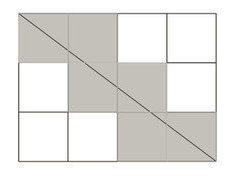

For `n = 3` and `m = 3`, the output should be `countBlackCells(n, m) = 7`

`7` cells have at least one common point with the diagonal and are painted black.
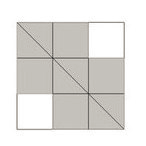

In [141]:
function countBlackCells(n, m) {
  const gcd = (a,b) => {while(b) [a,b] = [b, a%b]; return a; }
  
  return (n + m -1) + (gcd(n,m) -1);
}
[countBlackCells(3,4), // expected 6
 countBlackCells(3,3), // expected 7
 countBlackCells(2,5)] // expected 6

[ 6, 7, 6 ]

## Number: 
Determine if the given number is a power of some non-negative integer.

**Example**

* For `n = 125`, the output should be `isPower(n) = true`
* For `n = 72`, the output should be `isPower(n) = false`

Input/Output

[input] integer `n` - A positive integer.

Guaranteed constraints: `1 ≤ n ≤ 400`

[output] boolean

`true` if `n` can be represented in the form `a^b` (`a` to the power of `b`) where `a` and `b` are some non-negative integers and `b ≥ 2`, `false` otherwise.

In [142]:
function isPower(n) {
  return [2,3,5,7,11,13,17,19].map(e=>{
           let counter = 0;
           while(!(n%e)) {n/=e;counter++};
           return counter;
         })
         .filter(p=>p>0)
         .sort()
         .every( (pow, i, arr) => pow>1 && pow%arr[0]===0 );
}
[isPower(125), // expected true
 isPower(324)] // expected true

[ true, true ]

In [143]:
function isPower(n) {
    for(let b = 2; b < 10; b++){
        const root = n ** (1/b)
        if((root + 0.00001) % 1 <= 0.0001) return true;
    }
    return false;
}
[isPower(125), // expected true
 isPower(324)] // expected true

[ true, true ]

## Number: isSumOfConsecutive2
Find the number of ways to express n as sum of some (at least two) consecutive positive integers.

**Example**

* For `n = 9`, the output should be `isSumOfConsecutive2(n) = 2`

There are two ways to represent `n = 9`: `2 + 3 + 4 = 9` and `4 + 5 = 9`

* For `n = 8`, the output should be `isSumOfConsecutive2(n) = 0`

There are no ways to represent `n = 8`.

In [144]:
function isSumOfConsecutive2(n) {
  let count=0;
  let part;
  let div=2;
  let divOdd;
  while (part=n/div, 2*part>div) {
      divOdd = Boolean(div%2);
      if (div&1 && part%1===0 || ~div&1 && part%1===0.5) count++;
      div++;
  }
  return count;
}
isSumOfConsecutive2(99) // expected 5

5

In [145]:
function isSumOfConsecutive2(n) {
    let count = 0;
    for (let i = 1; i <= Math.ceil(n/2); i++) {
        isConsecutive(i, n) && count++;
    }
    return count;
}

function isConsecutive(a1, s) {
    let d = Math.pow(2 * a1 - 1, 2) + 8 * s;
    let n = (1 - 2 * a1 + Math.sqrt(d)) / 2;
    return n === Math.floor(n) && n > 1;
}
isSumOfConsecutive2(99) // expected 5

5

## Number: squareDigitsSequence
Consider a sequence of numbers a0, a1, ..., an, in which an element is equal to the sum of squared digits of the previous element. The sequence ends once an element that has already been in the sequence appears again.

Given the first element `a0`, find the length of the sequence.

**Example**

For `a0 = 16`, the output should be `squareDigitsSequence(a0) = 9`

Here's how elements of the sequence are constructed:

    a0 = 16
    a1 = 12 + 62 = 37
    a2 = 32 + 72 = 58
    a3 = 52 + 82 = 89
    a4 = 82 + 92 = 145
    a5 = 12 + 42 + 52 = 42
    a6 = 42 + 22 = 20
    a7 = 22 + 02 = 4
    a8 = 42 = 16, which has already occurred before (a0), Thus, there are 9 elements in the sequence.

For `a0 = 103`, the output should be `squareDigitsSequence(a0) = 4`

The sequence goes as follows: `103` -> `10` -> `1` -> `1`, 4 elements altogether.

In [146]:
function squareDigitsSequence(a0) {
    let a1;
    let memory= new Set();
    while (!memory.has(a0)){
      memory.add(a0);
      a1=0;
      while (a0>0){
        a1+= Math.pow(a0%10,2);
        a0=a0/10|0;
      }
      a0=a1;
    }
    return memory.size+1;
}
squareDigitsSequence(16) // expected 9

9

## Number: pagesNumberingWithInk
You work in a company that prints and publishes books. You are responsible for designing the page numbering mechanism in the printer. You know how many digits a printer can print with the leftover ink. Now you want to write a function to determine what the last page of the book is that you can number given the `current` page and `numberOfDigits` left. A page is considered numbered if it has the full number printed on it (e.g. if we are working with page `102` but have ink only for two digits then this page will not be considered numbered).

It's guaranteed that you can number the `current` page, and that you can't number the last one in the book.

In [147]:
function pagesNumberingWithInk(current, numberOfDigits) {
  let dpp = Math.log10(current)+1|0;  // digits per page on current level, e.g. for pages 10-99 => 2 digits
  while (numberOfDigits>=dpp){
    // digits to print on current level, e.g. from page 91 to 99: 9*2=18 digits
    d2p = Math.min((Math.pow(10,dpp)-current)*dpp, numberOfDigits);
    numberOfDigits -= d2p; // decrease digits left to print
    current += d2p/dpp|0;  // increase number of next page to be printed
    dpp++; // digits per page on the next level, e.g. 3 digits for pages 100-999
  }
  return current-1;  // last page printed
}
[pagesNumberingWithInk(1,5),  // expected 5
 pagesNumberingWithInk(8,5)]  // expected 10

[ 5, 10 ]

## Number: comfortableNumbers
Let's say that number `a` feels comfortable with number `b` if `a ≠ b` and `b` lies in the segment `[a - s(a), a + s(a)]`, where `s(x)` is the sum of `x`'s digits.

How many pairs `(a, b)` are there, such that `a < b`, both `a` and `b` lie on the segment `[l, r]`, and **each** number feels comfortable with the other (so `a` feels comfortable with `b` and `b` feels comfortable with `a`)?

In [148]:
function comfortableNumbers(l, r) {
  const sumDigits = (x)=>{
    let sum = 0;
    while (x>0){
      sum+=x%10;
      x=x/10|0;
    }
    return sum;
  }
  
  const isComfortable = (a,b)=>{
    let sumA = sumDigits(a);
    return a-sumA<=b && b<=a+sumA;
  }
  
 let count = 0;
 for (let a=l; a<r; a++)
   for (let b=a+1; b<=r; b++) 
     count += isComfortable(a,b) && isComfortable(b,a);
 return count;
}
[comfortableNumbers(10,12), // expected 2
 comfortableNumbers(239,777)] // expected 6166

[ 2, 6166 ]

## Number: weakNumbers
We define the *weakness* of number `x` as the number of positive integers smaller than `x` that have more divisors than `x`.

It follows that the weaker the number, the greater overall weakness it has. For the given integer `n`, you need to answer two questions:

1. what is the weakness of the weakest numbers in the range `[1, n]`?
2. how many numbers in the range `[1, n]` have this weakness?

Return the answer as an array of two elements, where the first element is the answer to the first question, and the second element is the answer to the second question.

In [149]:
function weakNumbers(n) {
  const getNumDivisors = (n) => {
    let divisors = 0;
    let i,j;
    for (i=1; i<=n; i++) 
      if (n%i===0) divisors++;
    return divisors;
  }
  const divisors = [];
  let maxWeakness = 0;
  let numOfweakests = 0;
  let currWeakness;
  for (i=0; i<n; i++) {
    currWeakness = 0;
    divisors.push(getNumDivisors(i+1));
    for (j=0; j < i; j++)
      if (divisors[i] < divisors[j]) currWeakness++;
    if (currWeakness === maxWeakness) numOfweakests++;
    else if (currWeakness > maxWeakness) {
      maxWeakness = currWeakness;
      numOfweakests = 1;
    }
  }
  return [maxWeakness,numOfweakests];
}
weakNumbers(500); // expected [403,1]

[ 403, 1 ]

In [150]:
function weakNumbers(n) {
  const primes = {
    list:[2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97,101],
    index:0,
    reset: ()=>{primes.index=0},
    getNext: (n)=>{
      if (primes.index===primes.list.length){
        let isPrime;
        for (let k=primes.list[primes.index-1]+2; k<=n; k+=2) {
          isPrime=true;
          for (let d=0; d<primes.list.length && primes.list[d]<=Math.sqrt(k); d++)
            if (k%primes.list[d]===0) {isPrime = false; break;}
          if (isPrime) {primes.list.push(k);break;};
        }    
      }
      return primes.list[primes.index++]
    }
  }
    
  const getNumDivisors = (n)=>{  
    let divisors=1;
    let prime, power;
    primes.reset();
    while (n>1) {
        prime = primes.getNext(n)
        power=0;
        while (n%prime===0) {power++; n=n/prime;}
        divisors *= power+1;
    }
    return divisors;
  }
  
  const divisors = [];
  let maxWeakness = 0;
  let numOfweakests = 0;
  let currWeakness;
  for (i=0; i<n; i++) {
    currWeakness = 0;
    divisors.push(getNumDivisors(i+1));
    for (j=0; j < i; j++)
      if (divisors[i] < divisors[j]) currWeakness++;
    if (currWeakness === maxWeakness) numOfweakests++;
    else if (currWeakness > maxWeakness) {
      maxWeakness = currWeakness;
      numOfweakests = 1;
    }
  }
  return [maxWeakness,numOfweakests];
}
weakNumbers(500); // expected [403,1]

[ 403, 1 ]

## Number: rectangleRotation
A rectangle with sides equal to even integers a and b is drawn on the Cartesian plane. Its center (the intersection point of its diagonals) coincides with the point (0, 0), but the sides of the rectangle are not parallel to the axes; instead, they are forming 45 degree angles with the axes.

How many points with integer coordinates are located inside the given rectangle (including on its sides)?

**Example**

For `a = 6` and `b = 4`, the output should be `rectangleRotation(a, b) = 23`

The following picture illustrates the example, and the `23` points are marked green:
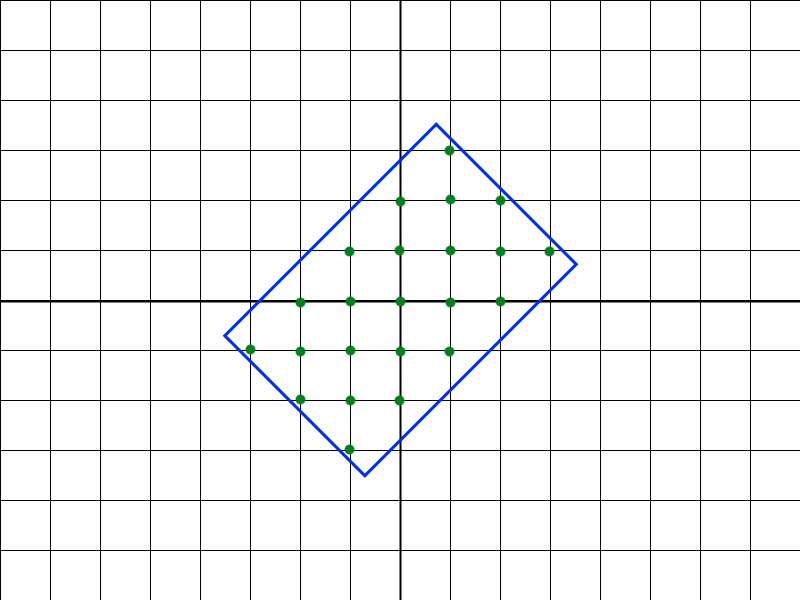

In [151]:
function rectangleRotation(a, b, rad=-Math.PI/4) {
    a/=2; b/=2;
    const points = [ {x:-a,y:b}, {x:-a,y:-b}, {x:a,y:-b}, {x:a,y:b} ];
    const r = {cos: Math.cos(rad), sin: Math.sin(rad)};
    points.forEach((p,i,a) => [a[i].x,a[i].y] = [p.x*r.cos - p.y*r.sin, p.x*r.sin + p.y*r.cos]);
    let maxX = 0;
    let maxY = 0;
    lines = points.map((p,i,a)=>{
        maxX = Math.max(maxX, Math.ceil(p.x));
        maxY = Math.max(maxY, Math.ceil(p.y));
        const nextI = (i+1)%4;
        const slope = (a[i].y-a[nextI].y) / (a[i].x-a[nextI].x);
        return {slope:     slope,
                intercept: a[i].y - slope*a[i].x};
    });
    let pointCount = 0;
    const inOrOut = [null,null,null,null];
    for (let x=-maxX; x<=maxX; x++){
        for (let y=-maxY; y<=maxY; y++){
            lines.forEach((line,i,a) => inOrOut[i] = y < x*line.slope + line.intercept);
            if (inOrOut[0]!==inOrOut[2] && inOrOut[1]!==inOrOut[3]) 
                pointCount++;
        }
    }
    return pointCount;
}
rectangleRotation(4,6); // expected 23

23

In [152]:
function rectangleRotation(a, b) {
  [a, b] = [a, b].map(c => (c / Math.sqrt(2)) | 0);
  return 2 * a * b + a + b | 1;
}
rectangleRotation(4,6); // expected 23

23

## String:
You're a crossword fanatic, and have finally decided to try and create your own. However, you also love symmetry and good design, so you come up with a set of rules they should follow:

* the crossword must contain exactly four words;
* these four words should form four pairwise intersections;
* all words must be written either left-to-right or top-to-bottom;
* the area of the rectangle formed by empty cells inside the intersections isn't equal to zero.

Given `4` words, find the number of ways to make a crossword following the above-described rules. Note that two crosswords which differ by rotation are considered different.

**Example**

For `words = ["crossword", "square", "formation", "something"]`, the output should be `crosswordFormation(words) = 6`.

The six crosswords can be formed as shown below:
```
      f                         f                             f
      o                     c r o s s w o r d     c r o s s w o r d
    c r o s s w o r d           r   o                   q     r
      m   q                     m   m                   u     m
      a   u            ;  s q u a r e          ;        a     a
      t   a                     t   t                   r     t
      i   r                     i   h             s o m e t h i n g
    s o m e t h i n g           o   i                         o
      n                         n   n                         n
                                    g
                 
    c         s               s
f o r m a t i o n       c     q               c         s
    o         m         r     u               r         o
    s q u a r e       f o r m a t i o n       o         m
    s         t    ;    s     r            ;  s q u a r e
    w         h         s o m e t h i n g     s         t
    o         i         w                     w         h
    r         n         o                   f o r m a t i o n
    d         g         r                     r         n
                        d                     d         g
```

In [153]:
function crosswordFormation(words) {
  const constructFormations = (words, count=0) => {
    const common = words.map((e,i,a)=>(setB = new Set(a[(i+1)%4]), new Set([...new Set(e)].filter(x=>setB.has(x)))));
    if (!common.some(s=>s.size===0))
      for (let c00=0;                 c00<words[0].length-2; c00++) if (common[0].has(words[0][c00]))
        for (let c10=0;                 c10<words[1].length-2; c10++) if (words[0][c00] === words[1][c10])
          for (let c11=c10+2;             c11<words[1].length;   c11++) if (common[1].has(words[1][c11]))
            for (let c20=0;                 c20<words[2].length-2; c20++) if (words[1][c11] === words[2][c20])
              for (let c21=c20+2;             c21<words[2].length;   c21++) if (common[2].has(words[2][c21]))
                for (let c31=words[3].length-1; c31>1;                 c31--) if (words[2][c21] === words[3][c31]) {
                  const c30=c31-(c11-c10);
                  const c01=c00+(c21-c20);
                  if (c01<words[0].length && words[0][c01] === words[3][c30]) count++;
                }
    return count;
  }
  let numberOfFormations = 0;  
  const permutate = (arr, perm=[]) => {
    if (arr.length === 0) 
      numberOfFormations += constructFormations(perm);
    else
      for (let i in arr) {
        let curr = arr.slice();
        let next = curr.splice(i, 1);
        permutate(curr.slice(), perm.concat(next));
      }
  }
  permutate(words);
  return numberOfFormations;
}

crosswordFormation(["formation","crossword","square","something"]);  // expected 6

6

In [154]:
crosswordFormation(["onomatopoeia","philosophical","provocatively","thesaurus"]);  // expected 20

20

## String: isTandemRepeat
Determine whether the given string can be obtained by one concatenation of some string to itself.

In [155]:
function isTandemRepeat1(inputString) {
    var middle = inputString.length / 2;
    return inputString.slice(0, middle) == inputString.slice(middle);
}
function isTandemRepeat2(inputString) {
  const half = inputString.length/2;
  for (let i=0; i<half; i++)
    if (inputString[i] != inputString[i+half]) return false;
  return true;
}
t0=0;
t1=0;
t0 = new Date().getTime();
for (let i=0; i<10000000; i++) isTandemRepeat1('tandemtandem');
t1 = new Date().getTime();
console.log("Call to 2xslice took " + (t1 - t0) + " milliseconds.")
t0=0;
t1=0;
t0 = new Date().getTime();
for (let i=0; i<10000000; i++) isTandemRepeat1('tandemtandem');
t1 = new Date().getTime();
console.log("Call to loop took " + (t1 - t0) + " milliseconds.")

Call to 2xslice took 692 milliseconds.
Call to loop took 590 milliseconds.


## String: isUnstablePair
Some file managers sort filenames taking into account case of the letters, others compare strings as if all of the letters are of the same case. That may lead to different ways of filename ordering.

Call two filenames an unstable pair if their ordering depends on the case.

To compare two filenames `a` and `b`, find the first position `i` at which `a[i] ≠ b[i]``. If `a[i] < b[i]``, then `a < b`. Otherwise a > b. If such position doesn't exist, the shorter string goes first.

Given two filenames, check whether they form an unstable pair.

In [156]:
function isUnstablePair(filename1, filename2) {
    return (filename1 < filename2) != (filename1.toLowerCase() < filename2.toLowerCase());
}
[isUnstablePair('aa', 'AAB'),  // expected true
 isUnstablePair('A','z')]  // expected false

[ true, false ]

## String: stringsConstruction
Given two strings a and b, both consisting only of lowercase English letters, your task is to calculate how many strings equal to a can be constructed using only letters from the string b? Each letter can be used only once and in one string only.

**Example**

For `x = "abc"` and `y = "abccba"`, the output should be `stringsConstruction(x, y) = 2`

We can construct 2 strings `x = "abc"` using only letters from the string `y`.

For `x = "ab"` and `y = "abcbcb"`, the output should be `stringsConstruction(x, y) = 1`

In [157]:
function stringsConstruction(a, b) {
  [a,b] = [a,b].map(x=>[...x].reduce((c,e)=>(c[e]=-~c[e],c),{}))
  return Object.entries(a).reduce((count,c)=>Math.min(count, (b[c[0]]/c[1]|0)), Number.MAX_VALUE);
}

In [158]:
function stringsConstruction(a, b) {
    return Math.min(...a.split("").map(i=>Math.floor((b.split(i).length-1)/(a.split(i).length-1))))}

In [159]:
function stringsConstruction(a, b) {
  for (let i = 0; ; i++) {
    for (let el of a) {
      if (b.includes(el)) b = b.replace(el, ``);
      else return i;
    }
  }
};

## String:
A **ciphertext alphabet** is obtained from the plaintext alphabet by means of rearranging some characters. For example `bacdef...xyz` will be a simple ciphertext alphabet where `a` and `b` are rearranged.

A **substitution cipher** is a method of encoding where each letter of the plaintext alphabet is replaced with the corresponding (i.e. having the same index) letter of some ciphertext alphabet.

Given two strings, check whether it is possible to obtain them from each other using some (possibly, different) substitution ciphers.

**Example**

For `string1 = "aacb"` and `string2 = "aabc"`, the output should be `isSubstitutionCipher(string1, string2) = true`

Any ciphertext alphabet that starts with `acb...` would make this transformation possible.

For `string1 = "aa"` and `string2 = "bc"`, the output should be `isSubstitutionCipher(string1, string2) = false`

In [160]:
function isSubstitutionCipher(a, b) {
    if (a.length != b.length) return false;
    const dicta={};
    const dictb={};
    for (let i=0; i<a.length;i++){
      if (dicta[a[i]])
        {if (dicta[a[i]] != b[i]) return false;}
      else dicta[a[i]] = b[i];
      if (dictb[b[i]])
        {if (dictb[b[i]] != a[i]) return false;}
      else dictb[b[i]] = a[i];
    }
    return true;
}
[isSubstitutionCipher('aacb','aabc'), // expected true
 isSubstitutionCipher('aa','bc'),     // expected false
 isSubstitutionCipher('abb','aba')]   // expected false

[ true, false, false ]

In [161]:
function isSubstitutionCipher(string1, string2){
  return [...string1].every((v,i) => string1.indexOf(v) === string2.indexOf(string2[i]));
}
[isSubstitutionCipher('aacb','aabc'), // expected true
 isSubstitutionCipher('aa','bc'),     // expected false
 isSubstitutionCipher('abb','aba')]   // expected false

[ true, false, false ]

## Array: containsDuplicates
Given an array of integers, write a function that determines whether the array contains any duplicates. Your function should return true if any element appears at least twice in the array, and it should return false if every element is distinct.

**Example**

For `a = [1, 2, 3, 1]`, the output should be `containsDuplicates(a) = true`

There are two 1s in the given array.

For `a = [3, 1]`, the output should be `containsDuplicates(a) = false`

The given array contains no duplicates.

In [162]:
function containsDuplicates(a) {
  return new Set(a).size !== a.length;
}
containsDuplicates([1, 2, 3, 1])  // expected true

true

## Array: sumOfTwo
You have two integer arrays, `a` and `b`, and an integer target value `v`. Determine whether there is a pair of numbers, where one number is taken from `a` and the other from `b`, that can be added together to get a sum of `v`. Return `true` if such a pair exists, otherwise return `false`.

**Example**

For ` = [1, 2, 3]`, `b = [10, 20, 30, 40]`, and `v = 42`, the output should be `sumOfTwo(a, b, v) = true`

In [163]:
function sumOfTwo(a, b, v) {
  setA = new Set(a)
  return b.some(eb=>setA.has(v-eb));
}

## Array: sumInRange
You have an array of integers nums and an array `queries`, where `queries[i]` is a pair of indices (0-based). Find the sum of the elements in nums from the indices at `queries[i][0]` to `queries[i][1]` (inclusive) for each query, then add all of the sums for all the queries together. Return that number modulo `10`^`9` + `7`.

**Example**

For `nums = [3, 0, -2, 6, -3, 2]` and `queries = [[0, 2], [2, 5], [0, 5]]`, the output should be `sumInRange(nums, queries) = 10`

The array of results for queries is `[1, 3, 6]`, so the answer is `1 + 3 + 6 = 10`

In [164]:
function sumInRange(nums, queries) {
    let total = 0;
    sums = nums.map((e,i) => (total += nums[i], total))
    sums.unshift(0)
    total = 0;
    for (let query of queries) total += sums[query[1]+1] - sums[query[0]];
    const mod = 1e9 + 7;
    return ((total % mod) + mod) % mod;
}
sumInRange([3, 0, -2, 6, -3, 2], [[0, 2], [2, 5], [0, 5]]); // expected 10

10

## Array: maxSubArraySum
Write a function that returns the sum of the max sub array `n` in an array of integers `arr`.
For example: `arr = [1,2,3,4]` and `n = 2`, the result is `7`. As `3`,`4` is the max sum of sub array of size `n`

In [165]:
function maxSubArraySum(arr, n) {
    let sumOfN = 0;
    for (let i=0; i<n; i++) sumOfN += arr[i];
    let maxSum = sumOfN;
    for (let i=1; i<arr.length-n+1; i++){
        sumOfN += -arr[i-1] + arr[i+n-1];
        maxSum = Math.max(maxSum,sumOfN);
    }
    return maxSum;
}

[ maxSubArraySum([1,2,5,2,8,1,5], 2), // expected 10
  maxSubArraySum([1,2,5,2,8,1,5], 3), // expected 15
  maxSubArraySum([1,2,5,2,8,1,5], 4)] // expected 17

[ 10, 15, 17 ]

## Array: arrayMaxConsecutiveSum2
The maximum sum subarray problem is the task of finding a contiguous subarray with the largest sum, within a given one-dimensional array `A[1...n]` of numbers. Formally, the task is to find indices `i` and `j` where the sum of elements from index i to j is as large as possible.

For example, for the array of values `[−2, 1, −3, 4, −1, 2, 1, −5, 4]`, the contiguous subarray with the largest sum is `[4, −1, 2, 1]`, with sum `6`.

Some properties of this problem are:

* If the array contains all non-negative numbers, then the problem is trivial; a maximum subarray is the entire array.
* If the array contains all non-positive numbers, then a solution is any subarray of size 1 containing the maximal value of the array (or the empty subarray, if it is permitted).
* Several different sub-arrays may have the same maximum sum.

In [166]:
function arrayMaxConsecutiveSum2(nums) {  // Kadane's algorithm
    let maxLocal = nums.shift();
    return nums.reduce((maxGlobal,num) => {
        maxLocal = Math.max(num, maxLocal + num);
        maxGlobal = Math.max(maxLocal, maxGlobal);
        return maxGlobal;
    }, maxLocal);
}
arrayMaxConsecutiveSum2([-2,1,-3,4,-1,2,1,-5,4]); // expected 6

6

## Array: findLongestSubarrayBySum
You have an unsorted array arr of non-negative integers and a number s. Find a longest contiguous subarray in arr that has a sum equal to s. Return two integers that represent its inclusive bounds. If there are several possible answers, return the one with the smallest left bound. If there are no answers, return `[-1]`.

Your answer should be 1-based, meaning that the first position of the array is 1 instead of 0.

In [167]:
function findLongestSubarrayBySum(s, nums) {
  let i=0, sum=0, maxLength=-1;
  return nums.reduce((result,e,j,arr)=>{
    sum += nums[j];
    while (s<sum && i<j) sum -= nums[i++];
    if (sum===s && maxLength < (j-i)){
      result = [i+1,j+1];
      maxLength = j-i;
    }
    return result;    
  },[-1]);
}
findLongestSubarrayBySum(12, [1, 2, 3, 7, 5]); // expected [2,4]

[ 2, 4 ]

## Number: productExceptSelf
You have an array nums. We determine two functions to perform on nums. In both cases, `n` is the length of `nums`:

`fi(nums) = nums[0] · nums[1] · ... · nums[i - 1] · nums[i + 1] · ... · nums[n - 1]`. (In other words, `fi(nums)` is the product of all array elements except the `i`th `nums`)
`g(nums) = f0(nums) + f1(nums) + ... + fn-1(nums)`
Using these two functions, calculate all values of `f` modulo the given `m`. Take these new values and add them together to get `g`. You should return the value of `g` modulo the given `m`

[solution](https://medium.com/codefight-on/codefights-solves-it-interview-practice-edition-productexceptself-c7ccf9312490)

In [168]:
function productExceptSelf(nums, m) {
  let p=1;
  return nums.reduce((s,num)=>{
    s = (p + s*num) % m;
    p = p*num % m;
    return s;
  },0)
}
productExceptSelf([1, 2, 3, 4], 12); //expected 2

2

## String: createAnagram
You are given two strings `s` and `t` of the same length, consisting of uppercase English letters. Your task is to find the minimum number of "replacement operations" needed to get some anagram of the string `t` from the string `s`. A replacement operation is performed by picking exactly one character from the string `s` and replacing it by some other character.

А string `x` is an anagram of a string `y` if one can get `y` by rearranging the letters of `x`. For example, the strings `MITE` and `TIME` are anagrams, so are `BABA` and `AABB`, but `ABBAC` and `CAABA` are not.

**Example**

* For `s = "AABAA"` and `t = "BBAAA"`, the output should be `createAnagram(s, t) = 1`
* For `s = "OVGHK"` and `t = "RPGUC"`, the output should be `createAnagram(s, t) = 4`

In [169]:
function createAnagram(s, t) {
  [countS,countT]=[s,t].map(str=>Array.from(str).reduce((count,e)=>(count[e]=-~count[e],count),{}));
  let countRep=0;
  for (cT of Object.entries(countT)){
    cS=countS[cT[0]];
    cS= (cS) ? cS : 0;
    countRep+=Math.abs(cT[1]-cS);
    delete countS[cT[0]];
  }
  for (cS of Object.entries(countS)){
    countRep+=Math.abs(cS[1]);
  }
  return countRep/2;
}
createAnagram("AABAA", "BBAAA") // expected 1

1

In [170]:
function createAnagram(s, t) {
    for(let x of s){
        t = t.replace(x,"");    
    }
    return t.length;
}
createAnagram("OVGHK", "RPGUC") // expected 4

4

## Loop: staircase
Write a function that prints a staircase to the console.
Your function should accept an integer and print `#` as the stair character.
Use of `.repeat` or multiplying the character is not allowed, loops only.

In [171]:
function staircase(width, stairBlock='#') {
    arr = Array(width).fill(' ')
    for (let i=0; i<width; i++) {
        arr[width-i-1] = stairBlock;
        console.log(arr.join(""))
    }
};

staircase(10);

         #
        ##
       ###
      ####
     #####
    ######
   #######
  ########
 #########
##########


## Human Readable Time
Write a function, which takes a non-negative integer (seconds) as input and returns the time in a human-readable format `HH:MM:SS`
If either Hours, Mins or Secs are single digits, they will need to be prepended with a leading zero.

In [172]:
function humanReadable(seconds) {
    const zeroPad2 = num => String(num).padStart(2, '0')
    const s = seconds % 60;
    seconds = (seconds - s) / 60;
    const m = seconds % 60;
    const h = (seconds - m) / 60;
    return [zeroPad2(h),zeroPad2(m),zeroPad2(s)].join(":");
};

[ humanReadable(0),       // expected  '00:00:00'
  humanReadable(5),       // expected  '00:00:05'
  humanReadable(60),      // expected  '00:01:00'
  humanReadable(86399),   // expected  '23:59:59'
  humanReadable(359999),  // expected  '99:59:59'
  humanReadable(459999)]  // expected '127:46:39'

[ '00:00:00',
  '00:00:05',
  '00:01:00',
  '23:59:59',
  '99:59:59',
  '127:46:39' ]

In [173]:
function humanReadable(seconds) {
    return [0,0].map(e=>(d=seconds%60, seconds=(seconds-d)/60, d))
           .concat([seconds])
           .map(d=>String(d).padStart(2, '0'))
           .reverse()
           .join(":");
};

[ humanReadable(0),       // expected  '00:00:00'
  humanReadable(5),       // expected  '00:00:05'
  humanReadable(60),      // expected  '00:01:00'
  humanReadable(86399),   // expected  '23:59:59'
  humanReadable(359999),  // expected  '99:59:59'
  humanReadable(459999)]  // expected '127:46:39'

[ '00:00:00',
  '00:00:05',
  '00:01:00',
  '23:59:59',
  '99:59:59',
  '127:46:39' ]

## Count the Number of Duplicates
Write a function that will return the count of distinct case-insensitive alphabetic characters and numeric digits that occur more than once in the input string.

In [174]:
function duplicateCount(text){
    return Object.values(Array.from(text.toLowerCase())
                         .reduce((counts,e)=>(counts[e]=-~counts[e],counts),{}))
           .filter(e=>e>1).length;
};

[ duplicateCount("abcde"),            // expected 0 # no characters repeat more than once
  duplicateCount("aabbcde"),          // expected 2 # 'a' and 'b'
  duplicateCount("aabBcde"),          // expected 2 # 'a' occurs twice and 'b' twice (`b` and `B`)
  duplicateCount("indivisibility"),   // expected 1 # 'i' occurs six times
  duplicateCount("Indivisibilities"), // expected 2 # 'i' occurs seven times and 's' occurs twice
  duplicateCount("aA11"),             // expected 2 # 'a' and '1'
  duplicateCount("ABBA")]             // expected 2 # 'A' and 'B' each occur twice

[ 0, 2, 2, 1, 2, 2, 2 ]

## Caesar's Cipher ( Rot13 )
ROT13 is a simple letter substitution cipher that replaces a letter with the letter 13 letters after it in the alphabet. ROT13 is an example of the Caesar cipher.
Create a function that takes a string and returns the string ciphered with Rot13. If there are numbers or special characters included in the string, they should be returned as they are. Only letters from the latin/english alphabet should be shifted, like in the original Rot13 “implementation”.

In [175]:
function caesarsCipher(message, rot=13){
  const match = ['a'.charCodeAt(0), 'z'.charCodeAt(0), 'A'.charCodeAt(0), 'Z'.charCodeAt(0)];
  const twentysix = match[1]-match[0]+1
  let a, code;
  return Array.from(message).map(c=>{
      code = c.charCodeAt(0);
      if (match[0]<=code && code<=match[1])      a=match[0];
      else if (match[2]<=code && code<=match[3]) a=match[2];
      else return c;
      return String.fromCharCode(a+(code-a+rot) % twentysix);
  }).join("");
}

[ caesarsCipher('abcdefghijklmnopqrstuvwxyz'), // expected nopqrstuvwxyzabcdefghijklm
  caesarsCipher('JavaScript is cool!'),        // expected WninFpevcg vf pbby!
  caesarsCipher('10 + two is twelve.'),        // expected 10 + gjb vf gjryir.
  caesarsCipher('Caesars Cipher 13.')]         // expected Pnrfnef Pvcure 13.

[ 'nopqrstuvwxyzabcdefghijklm',
  'WninFpevcg vf pbby!',
  '10 + gjb vf gjryir.',
  'Pnrfnef Pvcure 13.' ]

In [176]:
function caesarsCipher(message, rot=13){
  const d = [az2='abcdefghijklmnopqrstuvwxyz'.repeat(2), az2.toUpperCase()];
  const c = d.map(a=>a.charCodeAt()-rot);
  return message.replace(/([a-z])|[A-Z]/g,(m,low)=>(i=low?0:1, d[i][m.charCodeAt()-c[i]]));
}

[ caesarsCipher('abcdefghijklmnopqrstuvwxyz'), // expected nopqrstuvwxyzabcdefghijklm
  caesarsCipher('JavaScript is cool!'),        // expected WninFpevcg vf pbby!
  caesarsCipher('10 + two is twelve.'),        // expected 10 + gjb vf gjryir.
  caesarsCipher('Caesars Cipher 13.')]         // expected Pnrfnef Pvcure 13.

[ 'nopqrstuvwxyzabcdefghijklm',
  'WninFpevcg vf pbby!',
  '10 + gjb vf gjryir.',
  'Pnrfnef Pvcure 13.' ]

In [177]:
function caesarsCipher13(message){
  return message.replace(/([a-z])|[A-Z]/g,(m,low)=>(i=low?0:1, 
    ['abcdefghijklmnopqrstuvwxyzabcdefghijklm',
     'ABCDEFGHIJKLMNOPQRSTUVWXYZABCDEFGHIJKLM'][i][m.charCodeAt()-[84,52][i]]));
}

[ caesarsCipher13('abcdefghijklmnopqrstuvwxyz'), // expected nopqrstuvwxyzabcdefghijklm
  caesarsCipher13('JavaScript is cool!'),        // expected WninFpevcg vf pbby!
  caesarsCipher13('10 + two is twelve.'),        // expected 10 + gjb vf gjryir.
  caesarsCipher13('Caesars Cipher 13.')]         // expected Pnrfnef Pvcure 13.

[ 'nopqrstuvwxyzabcdefghijklm',
  'WninFpevcg vf pbby!',
  '10 + gjb vf gjryir.',
  'Pnrfnef Pvcure 13.' ]

## String: findShortestWords
Given a string of words, return the length of the shortest word(s).

In [178]:
function findShortestWords(string) {
    return Math.min(...string.split(" ").map(w=>w.length));
};

[ findShortestWords("bitcoin take over the world maybe who knows perhaps"), // expected 3
  findShortestWords("Dogecoin Mine Bitcoin Factom Ripple MadeSafeCoin"),    // expected 4
  findShortestWords("Steem Dogecoin Factom Factom Ripple MadeSafeCoin Classic ProofOfStake 21inc")]; // expected 5

[ 3, 4, 5 ]

In [179]:
function findShortestWords(string) {
    return Math.min(...string.match(/\w+/g).map(w=>w.length));
};

[ findShortestWords("bitcoin take over the world maybe who knows perhaps"), // expected 3
  findShortestWords("Dogecoin Mine Bitcoin Factom Ripple MadeSafeCoin"),    // expected 4
  findShortestWords("Steem Dogecoin Factom Factom Ripple MadeSafeCoin Classic ProofOfStake 21inc")]; // expected 5

[ 3, 4, 5 ]

In [180]:
function findShortestWords(string) {
    let min=string.length;
    let len=0, char;
    for (let i=0; i<=string.length; i++){
        char = string[i];
        if (char==' ' || !char) [min,len]=[Math.min(min,(len==0)?min:len), 0];
        else len++
    }
    return min;
};

[ findShortestWords("a  b"), // expected 1
  findShortestWords("bitcoin take over the world maybe who knows perhaps"), // expected 3
  findShortestWords("Dogecoin Mine Bitcoin Factom Ripple MadeSafeCoin"),    // expected 4
  findShortestWords("Steem Dogecoin Factom Factom Ripple MadeSafeCoin Classic ProofOfStake 21inc")]; // expected 5

[ 1, 3, 4, 5 ]

## String: reverseString
Given a string, return the string in reverse.
You are not allowed to use the `.reverse()` method.

For an extra challenge try using recursion...
For an explanation and tutorial of recursion, watch this video https://www.youtube.com/watch?v=6oDQaB2one8

In [181]:
function reverseString(string) {
    return [...string].reduce((arr,char,ind)=>
                              (arr[string.length-ind-1]=char,arr),Array(string.length).fill(null))
           .join("");
};

[ reverseString('Reverse the letters in this string'), // expected gnirts siht ni srettel eht esreveR
  reverseString('Can you do it with recursion?')]      // expected ?noisrucer htiw ti od uoy naC

[ 'gnirts siht ni srettel eht esreveR',
  '?noisrucer htiw ti od uoy naC' ]

In [182]:
function reverseString(string) {
    if (string.length < 2) return string;
    else return string.slice(-1)
               +reverseString(string.slice(1,-1))
               +string[0]
};

[ reverseString('Reverse the letters in this string'), // expected gnirts siht ni srettel eht esreveR
  reverseString('Can you do it with recursion?')]      // expected ?noisrucer htiw ti od uoy naC

[ 'gnirts siht ni srettel eht esreveR',
  '?noisrucer htiw ti od uoy naC' ]

In [183]:
function reverseString(string) {
    return string.replace(/./g, (_,i,s)=>s[s.length-i-1])
};

[ reverseString('Reverse the letters in this string'), // expected gnirts siht ni srettel eht esreveR
  reverseString('Can you do it with recursion?')]      // expected ?noisrucer htiw ti od uoy naC

[ 'gnirts siht ni srettel eht esreveR',
  '?noisrucer htiw ti od uoy naC' ]

## Number: convertToRoman
Write a function that converts the given number to a roman numerial (Uppercase)
A list of roman numerials can be found here:
https://www.math-salamanders.com/roman-numerals-list.html

In [184]:
function convertToRoman(value) {
    numerals = [ 'M','CM','D','CD','C','XC','L','XL','X','IX','V','IV','I'];
    values   = [1000, 900,500, 400,100,  90, 50,  40, 10,   9,  5,   4,  1];
    return values.map((v,i)=>(d=value/v,value%=v,numerals[i].repeat(d))).join("");
};

[ convertToRoman(5),     // expected V
  convertToRoman(12),    // expected XII
  convertToRoman(29),    // expected XXIX
  convertToRoman(68),    // expected LXVIII
  convertToRoman(99),    // expected XCIX
  convertToRoman(400),   // expected CD
  convertToRoman(649),   // expected DCXLIX
  convertToRoman(891),   // expected DCCCXCI
  convertToRoman(1006),  // expected MVI
  convertToRoman(2014),  // expected MMXIV
  convertToRoman(3999)]  // expected MMMCMXCIX

[ 'V',
  'XII',
  'XXIX',
  'LXVIII',
  'XCIX',
  'CD',
  'DCXLIX',
  'DCCCXCI',
  'MVI',
  'MMXIV',
  'MMMCMXCIX' ]

## Array: moveZeros
Write a function that accepts an array and returns an array with any zeros moved to the end, all other elements should have their order preserved.

In [185]:
// this one changes the original array by removing and appending elements
function moveElementsToTheEnd(arr, toBeMoved=0) {
    let end=arr.length;
    for (let i=0;i<end;)
        if (arr[i]===toBeMoved){
            arr.push(arr.splice(i,1)[0]);
            end--
        } else i++;
    return arr;
};

[ moveElementsToTheEnd([ 0, 0, 0, 1, 2, 0, 1, 1, 3, 1]),
  moveElementsToTheEnd([ 1, 2, 0, 1, 0, 1, 0, 3, 0, 1]),
  moveElementsToTheEnd([ 9, 9, 0, 0, 1, 2, 0, 1, 1, 3, 1, 9, 9, 0]),
  moveElementsToTheEnd([ 1, null, 0, 2, false, 1, 0])]

console.time("test")
for (let i=0; i<1000000; i++){
    moveElementsToTheEnd([ 0, 0, 0, 1, 2, 0, 1, 1, 3, 1]);
    moveElementsToTheEnd([ 1, 2, 0, 1, 0, 1, 0, 3, 0, 1]);
    moveElementsToTheEnd([ 9, 9, 0, 0, 1, 2, 0, 1, 1, 3, 1, 9, 9, 0]);
    moveElementsToTheEnd([ 1, null, 0, 2, false, 1, 0]);
} 
console.timeEnd("test")

test: 5155.799ms


In [186]:
// this one changes the original array in-place by switching one pair only at a time
function moveElementsToTheEnd(arr, toBeMoved=0) {
    for (let i=0;i<arr.length;i++){
        if (arr[i]===toBeMoved)
            for (let j=i+1;j<arr.length;j++){
                if (arr[j]!==toBeMoved){
                    [arr[i],arr[j]]=[arr[j],arr[i]];
                    break;
                }
            }     
    };
    return arr;
};

[ moveElementsToTheEnd([ 0, 0, 0, 1, 2, 0, 1, 1, 3, 1]), // expected [ 1, 2, 1, 1, 3, 1, 0, 0, 0, 0]
  moveElementsToTheEnd([ 1, 2, 0, 1, 0, 1, 0, 3, 0, 1]), // expected [ 1, 2, 1, 1, 3, 1, 0, 0, 0, 0]
  moveElementsToTheEnd([ 9, 9, 0, 0, 1, 2, 0, 1, 1, 3, 1, 9, 9, 0]),// expected [9,9,1,2,1,1,3,1,9,9,0,0,0,0]
  moveElementsToTheEnd([ 1, null, 0, 2, false, 1, 0])]   // expected [ 1, null, 2, false, 1, 0, 0]

console.time("test")
for (let i=0; i<1000000; i++){
    moveElementsToTheEnd([ 0, 0, 0, 1, 2, 0, 1, 1, 3, 1]);
    moveElementsToTheEnd([ 1, 2, 0, 1, 0, 1, 0, 3, 0, 1]);
    moveElementsToTheEnd([ 9, 9, 0, 0, 1, 2, 0, 1, 1, 3, 1, 9, 9, 0]);
    moveElementsToTheEnd([ 1, null, 0, 2, false, 1, 0]);
}
console.timeEnd("test")

test: 1296.345ms


## Array: sortedSquaredArray
Given an array of sorted integers. Write a function that returns a sorted array of those same integers squared.
Ideally this should be written with O(n) linear time complexity. This is an interview question from one of the big four tech companies. Execution speed is important here.
hint: use the 2 pointer array traversing method to complete this challenge

In [187]:
function sortedSquaredArray(array) {
    let start = 0;
    let end   = array.length-1;
    const result = Array(array.length).fill(null);
    result.forEach((_,i,a) => a[array.length-1-i] = 
                              ( Math.abs(array[start]) > Math.abs(array[end]) ) 
                                ? Math.pow(array[start++],2) 
                                : Math.pow(array[end--],2));
    return result;
};

[ sortedSquaredArray([-8, -6, -4, 1, 2, 3, 5]), // expected [ 1, 4, 9, 16, 25, 36, 64 ]
  sortedSquaredArray([1, 2, 3, 4, 5, 6])]       // expected [ 1, 4, 9, 16, 25, 36 ]

console.time("test")
for (let i=0; i<1000000; i++){
    sortedSquaredArray([-8, -6, -4, 1, 2, 3, 5]);
    sortedSquaredArray([1, 2, 3, 4, 5, 6]);
}
console.timeEnd("test")

test: 512.060ms


In [188]:
function sortedSquaredArray(array) {
    let start = 0;
    let end   = array.length-1;
    const result = Array(array.length);
    for (let i=end; i>=0; i--)
        result[i] = ( Math.abs(array[start]) > Math.abs(array[end]) ) 
                     ? Math.pow(array[start++],2) 
                     : Math.pow(array[end--],2);
    return result;
};

[ sortedSquaredArray([-8, -6, -4, 1, 2, 3, 5]), // expected [ 1, 4, 9, 16, 25, 36, 64 ]
  sortedSquaredArray([1, 2, 3, 4, 5, 6])]       // expected [ 1, 4, 9, 16, 25, 36 ]

console.time("test")
for (let i=0; i<1000000; i++){
    sortedSquaredArray([-8, -6, -4, 1, 2, 3, 5]);
    sortedSquaredArray([1, 2, 3, 4, 5, 6]);
}
console.timeEnd("test")

test: 211.441ms


## String: diamond
Write a function that prints a Diamond shape to the console by *returning a single string*, using the asterisk `*` character as the printable character.
Remove trailing spaces and finish every line with a `\n`.
Return `null` / `None` if the input is an *even* number or *negative*.

A diamond with input 9 would look like:
```bash
    *
   ***
  *****
 *******
*********
 *******
  *****
   ***
    *
```

In [189]:
function diamond(n, block='*') {
  if (n%2==0 || n<0) return null;
  const p = ' '.repeat(n) + block.repeat(n);
  let d = p.slice(n)+'\n';
  for (let i=1; i<n/2; i++) {
      const a = p.slice(n-i,2*(n-i)) + '\n';
      d =  a + d + a;
  }
  return d;
};

for (let n of [0,1,3,5,9,10]) console.log(diamond(n));

null
*

 *
***
 *

  *
 ***
*****
 ***
  *

    *
   ***
  *****
 *******
*********
 *******
  *****
   ***
    *

null


## String: highAndLow
Write a function that returns a string containing the highest and lowest number, given a string of space separated numbers.
It should be in the format “highest lowest” -> `20 12`

In [190]:
// quickest solution
function highAndLow(numbers){
  let high = null;
  let low = null;
  for (let n of numbers.split(' ')) {
    n = +n;
    if (high === null || n > high) high = n;
    if (low === null || n < low) low = n;
  };
  return high + ' ' + low;
};

[ highAndLow("4 5 29 54 4 0 -214 542 -64 1 -3 6 -6"), // expected "542 -214"
  highAndLow("10 2 -2 -10"),                          // expected "10 -10"
  highAndLow("1 -1"),                                 // expected "1 -1"
  highAndLow("42"),                                   // expected "42 42"
  highAndLow("1 -1 0")]                               // expected "1 -1"

[ '542 -214', '10 -10', '1 -1', '42 42', '1 -1' ]

In [191]:
function highAndLow2(numbers){
    const nums = numbers.split(" ");
    return Math.max(...nums) +' '+ Math.min(...nums);
};

In [192]:
console.time("test1")
for (let i=0; i<10000000; i++)
    highAndLow("4 5 29 54 4 0 -214 542 -64 1 -3 6 -6");
console.timeEnd("test1")

console.time("test2")
for (let i=0; i<10000000; i++)
    highAndLow2("4 5 29 54 4 0 -214 542 -64 1 -3 6 -6");
console.timeEnd("test2")


test1: 6909.399ms
test2: 11119.172ms


## Number: isIntegerPalindrome
Write a function that returns a boolean indicating whether the given integer is a palindrome.
You are not allowed to use any strings / string methods in your function.

In [193]:
function isIntegerPalindrome(num) {
    let pow10 = Math.pow(10,Math.log10(num)|0);
    let left, right;
    while (num>0){
        left  = num/pow10 | 0;
        right = num%10;
        if (left != right) return false;
        num = (num - left*pow10) / 10 |0;
        pow10 /= 100;
    }
    return true;
};

[ isIntegerPalindrome(1331),    // expected true
  isIntegerPalindrome(1),       // expected true
  isIntegerPalindrome(1234),    // expected false
  isIntegerPalindrome(12365),   // expected false
  isIntegerPalindrome(9876789)] // expected true

[ true, true, false, false, true ]

## Array: mergeArrays
Write a function that given two arrays of possibly different lengths returns one single merged array.

In [194]:
function mergeArrays(a, b) {
  const merged = [];
  const arrs = [a,b];
  const shorter = (a.length<b.length) ? 0 : 1;
  for (let i=0;i<arrs[shorter].length;i++){
      merged.push(a[i]);
      merged.push(b[i]);
  }
  const longer = 1-shorter;
  for (let i=arrs[shorter].length;i<arrs[longer].length;i++)
      merged.push(arrs[longer][i]);
  return merged;
};

[ mergeArrays(['a', 'b', 'c', 'd', 'e'], [1, 2, 3, 4]), // expected [ 'a', 1, 'b', 2, 'c', 3, 'd', 4, 'e' ]
  mergeArrays([5, 6, 7, 8], ['d', 'e', 'f', 'g', 'h'])] // expected [ 5, 'd', 6, 'e', 7, 'f', 8, 'g', 'h' ]

[ [ 'a', 1, 'b', 2, 'c', 3, 'd', 4, 'e' ],
  [ 5, 'd', 6, 'e', 7, 'f', 8, 'g', 'h' ] ]

## RegEx: isValidEmailAddress
Write a function that uses a regular expression that validates an email address.
>you can use https://regexr.com/ to create your regex, they have a great cheatsheet!

Rules:
- username must be larger than 5 characters
- username may only contain alphanumeric characters
- dots are allowed but not in succession
- must contain a single @
- domain and host name must both be greater than 2 characters and seperated with a dot

In [195]:
function isValidEmailAddress(email) {
    return (/^(?=.{6,}@)(?!.*\.\.)[a-z0-9\.]+@[a-z0-9]{2,}\.[a-z0-9]{2,}$/gi).test(email);
};

[ isValidEmailAddress('john.smith@gmail.com'),      // expected true
  isValidEmailAddress('johnsmith@outlook.com'),     // expected true
  isValidEmailAddress('john..smith@gmail.com'),     // expected false
  isValidEmailAddress('john.paul.smith@gmail.com'), // expected true
  isValidEmailAddress('john-smith@gmail.com'),      // expected false
  isValidEmailAddress('johnsmith@gmail'),           // expected false
  isValidEmailAddress('johnsmith.gmail.com')]       // expected false

[ true, true, false, true, false, false, false ]

Learnt from [this](https://stackoverflow.com/a/12019115/8634389) to limit the username length: `(?=.{6,}@)`, and excluding `..` from user name: `(?!.*\.\.)`. For host name I allow one word only. See the whole explanation of the regex [here](https://regexr.com/5rqqd).

## Array: bubbleSort
Write a function `bubbleSort` which takes an array of integers as input and returns an array of these integers in sorted order from least to greatest.
>The bubble sort method starts at the beginning of an unsorted array and ‘bubbles up’ unsorted values towards the end, iterating through the array until it is completely sorted. It does this by comparing adjacent items and swapping them if they are out of order. The method continues looping through the array until no swaps occur at which point the array is sorted.
* Here is just one visualisation you can see to implement this method. https://www.youtube.com/watch?v=9I2oOAr2okY
* You are only allowed to use for loops or a while loop, no array sorting methods allowed!
* The array must be sorted in place, no additional arrays should be created.

In [196]:
function bubbleSort(array) {
    let stopNext;
    let length = array.length;
    while (!stopNext){
        length--;
        stopNext = true;
        for (let j=0; j<length; j++)
            if (array[j]>array[j+1])
                [array[j], array[j+1], stopNext] = [array[j+1], array[j], false]
    }
    return array;
};

[ bubbleSort([225,9,2,6,100,4,1,8,7,1001,3,5]),             // expected [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 100, 225, 1001 ]
  bubbleSort([6,5,4,3,2,1]),                                // expected [ 1, 2, 3, 4, 5, 6]
  bubbleSort([ -9, 2, -6, -100, 4, 1, -8, 7, 1001, -3, 5])] // expected [ -100, -9, -8, -6, -3, 1, 2, 4, 5, 7, 1001 ]

[ [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 100, 225, 1001 ],
  [ 1, 2, 3, 4, 5, 6 ],
  [ -100, -9, -8, -6, -3, 1, 2, 4, 5, 7, 1001 ] ]

## Object: stringifyObjectNumbers
You will be given an object as an argument. Your goal is to return an object of the same values and structure except all keys that have integers as values must have their values converted to strings.
Suggested  code to use that may help you solve this challenge:
* `for … in`  loop - to loop over objects
* `typeof` to check a key's type - note , arrays will return the value `object` so additional checks will be needed if checking for an object
* recursion -  to loop over nested objects

In [197]:
function stringifyObjectNumbers(obj) {
    if (typeof(obj)=='number') return obj.toString();
    if (typeof(obj)!='object') return obj;
    const newObj = (Array.isArray(obj)) ? [] : {};
    for (let key in obj) newObj[key] = stringifyObjectNumbers(obj[key]);
    return newObj;
};

stringifyObjectNumbers({
    num: 1,
    test: [1,2],
    data: {
        val: 4,
        info: {
            isRight: true,
            random: 66,
        },
    }
});

// expected
// { num: '1',
//   test: ['1','2'],
//   data: { val: '4', 
//           info: { isRight: true, random: '66' } } }

{ num: '1',
  test: [ '1', '2' ],
  data: { val: '4', info: { isRight: true, random: '66' } } }

In [198]:
stringifyObjectNumbers({
    name: "Paul",
    age: 35,
    info: {
        isLeft: false,
        fixed: 100,
    }
});

// expected
// { name: "Paul",
//   age: "35",
//   info: { isLeft: false, fixed: "100" } }

{ name: 'Paul',
  age: '35',
  info: { isLeft: false, fixed: '100' } }

## RegEx: titleCaseSentence
Write a function that returns the provided string with the first letter of each word capitalized. Make sure the rest of the word is in lower case.

In [199]:
function titleCaseSentence(string) {
    return string.replace(/\b(\w)([\w']*)\b/gi, (c,g1,g2)=>g1.toUpperCase()+g2.toLowerCase());
};

[ titleCaseSentence("I'm a little tea pot"),               // expected I'm A Little Tea Pot
  titleCaseSentence("sHoRt AnD sToUt"),                    // expected Short And Stout
  titleCaseSentence("HERE IS MY HANDLE HERE IS MY SPOUT")] // expected Here Is My Handle Here Is My Spout

[ 'I\'m A Little Tea Pot',
  'Short And Stout',
  'Here Is My Handle Here Is My Spout' ]

## Number: factorialise
Write a function that returns the product of all positive integers less than or equal to n

In [200]:
function factorialise(n, f=1) {
    while (n) f*=n--;
    return f
}

[ factorialise(5),  // -> (1 * 2 * 3 * 4 * 5) -> 120
  factorialise(10), // -> 3628800
  factorialise(20), // -> 2432902008176640000
  factorialise(0)]  // -> 1

[ 120, 3628800, 2432902008176640000, 1 ]

In [201]:
function factorialise(n) {
    return Array(n).fill(null).reduce((f,_,i)=>++i*f,1);
}

[ factorialise(5),  // -> (1 * 2 * 3 * 4 * 5) -> 120
  factorialise(10), // -> 3628800
  factorialise(20), // -> 2432902008176640000
  factorialise(0)]  // -> 1

[ 120, 3628800, 2432902008176640000, 1 ]

## RegEx: pigLatin
>Pig Latin is a way of altering English Words. (This is a simpler rule based version)

Write a function that returns a string with the folowing rules.
1. Move the first letter of each word to the end of it.
2.  Then add "ay" to the end of the word.
3.  Leave punctuation marks untouched.

In [202]:
function pigLatin(string) {
  return string.replace(/\b(\w)(\w*)\b/gi, (m,g1,g2)=>g2+g1+'ay');
};


[ pigLatin('Pig latin is cool'), // expected igPay atinlay siay oolcay
  pigLatin('Hello world !')]     // expected elloHay orldway !

[ 'igPay atinlay siay oolcay', 'elloHay orldway !' ]

## String: isPalindrome
Write a function that returns `true` if the given string is a palindrome. Otherwise, return `false`.
>A palindrome is a word or sentence that’s spelled the same way both forward and backward, ignoring punctuation, case, and spacing.

Leave out the non alphanumeric characters from the evaluation.

In [54]:
function isPalindrome(st){
  let length = st.length;
  const getCode = (str,index)=>{
    const code = str.charCodeAt(index);
    if (code>=65 && code<=90) return code+32;
    if ( (code>=97 && code<=122) || (code>=48 && code<=57)) return code;
    length--;
    return 0;
  }
  let i = -1;
  let j = st.length;
  while (i<j){
    let left = right = 0;
    while (!(left =getCode(st,++i)) && i<j);
    while (!(right=getCode(st,--j)) && i<j);
    if (left && right && left!=right) return false;
  }
  return length>0;
}

[isPalindrome('race! car'),          // expected true
 isPalindrome('Racecar'),            // expected true
 isPalindrome('2A3*3a2'),            // expected true
 isPalindrome('not a palindrome'),   // expected false
 isPalindrome('1 eye for of 1 eye')] // expected false

[ true, true, true, false, false ]

## Set: noZerosSet
Write a function that given two arrays, creates a `Set` from the two arrays merged together, if the set contains a `0`, return `null`, otherwise return the `size` of the set.

In [69]:
function noZerosSet(arr1, arr2) {
  s = new Set(arr1.concat(arr2));
  return s.has(0) ? null : s.size;
}

[ noZerosSet([1,2,3], [2,3,4]),    // expected 4
  noZerosSet([0,1,2,3], [2,3,4]) ] // expected null

[ 4, null ]

## Prototype:
Alter the Array Object Prototype to include a new method called has.

This method should return a boolean indicating whether the array being called upon contains the passed argument.
This challenge will introduce you to the object prototype chain, you will learn how to create your own prototype methods, and understand how useful it can be.

For example, Imagine we have a program that needs to check for the presence of a value in an array multiple times, we could write a custom method on the Array Prototype, and have it be called just like any other array method such as `push`, `map` or `forEach`

Note: The value of `this` is the object on which it is being called upon.

Useful links:
- https://www.w3schools.com/jsref/jsref_prototype_array.asp
- https://developer.mozilla.org/en-US/docs/Learn/JavaScript/Objects/Object_prototypes

In [10]:
Array.prototype.has = function(element) {
    return this.indexOf(element) >= 0;
};

[ [1,2,3,4,5].has(5),                            // expected true
  ['one', 'two', 'three', 'four'].has('five'),   // expected false
  ['1', '2', '3', '4', '5'].has('5'),            // expected true
  [0, false, true, undefined].has(null) ]        // expected false

[ true, false, true, false ]

## Number: convertRGBToHex
Given a valid RGB color, write a function that converts and return the input value to a hex color.
- Learn about the base16 system -> `0123456789ABCDEF`
- Letters should be uppercase
- hex color code should start with a `#`

In [1]:
function convertRGBToHex(...args) {
    return args.reduce((hex,dec,i)=>hex+dec.toString(16).toUpperCase().padStart(2,'0'),"#");
};

[ convertRGBToHex(255,24,67),   // expected #FF1843
  convertRGBToHex(201,156,79),  // expected #C99C4F
  convertRGBToHex(255,255,255), // expected #FFFFFF
  convertRGBToHex(0,0,0)]       // expected #000000

[ '#FF1843', '#C99C4F', '#FFFFFF', '#000000' ]

## Number: isPrime
Write a function that returns a boolean determining whether a given number is a prime number.
A prime number is a natural number greater than `1` with no positive divisors other than `1` and itself. e.g. `2`, `3`, `5`, `7`, `11`

In [4]:
function isPrime(num) {
    if (num==2) return true;
    if (num<2 || num%2==0) return false;
    sqrt = Math.sqrt(num);
    for (let d=3; d<=sqrt; d+=2)
        if (num%d==0) return false;
    return true;
};

[ isPrime(2),  // expected true
  isPrime(5),  // expected true
  isPrime(6),  // expected false
  isPrime(7),  // expected true
  isPrime(9)]  // expected false

5 2.23606797749979
7 2.6457513110645907
9 3


[ true, true, false, true, false ]

In [6]:
function isPrime(num) {
  const primes = {
    list:[2,3],
    index:0,
    reset: ()=>{primes.index=0},
    getNext: (n)=>{
      if (primes.index===primes.list.length){
        let isPrime;
        for (let k=primes.list[primes.index-1]+2; k<=n; k+=2) {
          isPrime=true;
          const sqrtK=Math.sqrt(k);
          for (let d=0; d<primes.list.length && primes.list[d]<=sqrtK; d++)
            if (k%primes.list[d]===0) {isPrime = false; break;}
          if (isPrime) {primes.list.push(k);break;};
        }    
      }
      return primes.list[primes.index++]
    }
  }
  
  if (num<2) return false;
  sqrtNum = Math.sqrt(num);
  while ((prime=primes.getNext()) <= sqrtNum)
    if (num%prime==0) return false;
  return true;  
}
  
[ isPrime(2),  // expected true
  isPrime(5),  // expected true
  isPrime(6),  // expected false
  isPrime(7),  // expected true
  isPrime(9)]  // expected false

[ true, true, false, true, false ]

## Number: returnMultiplesOf3
Write a function that returns an array containing the multiples of 3 between the two given integer arguments - inclusive.
You must not use any loops in your code - use recusion only.

Example: `(1, 6)` -> `[3, 6]`

Remember, recursion needs a base case, and a recursive expression

In [12]:
function returnMultiplesOf3(a, b, divisibleBy3=false) {
    if (!divisibleBy3) a += (rem=a%3) ? 3-rem : 0;
    if (a>b) return []
    return [a].concat(returnMultiplesOf3(a+3, b ,true));
};

[ returnMultiplesOf3(1, 6),  // expected (1,  6) -> [3, 6]
  returnMultiplesOf3(1,20)]  // expected (1, 20) -> [ 3, 6, 9, 12, 15, 18 ]

[ [ 3, 6 ], [ 3, 6, 9, 12, 15, 18 ] ]

## Array: zip
The Python built in method `zip` takes two iterables and returns an iterator object which contains a series of tuples , each containing elements from each iterable. Write your own implementation of the `zip` function, returning a list of lists.

In [11]:
function zip_short(a,b) {
  if (a.length<b.length) return a.map((e,i)=>[e,b[i]]);
  return b.map((e,i)=>[a[i],e]);
};

function zip_long(a,b) {
  if (a.length>b.length) return a.map((e,i)=>[e,b[i]]);
  return b.map((e,i)=>[a[i],e]);
};

[ zip_short([0, 1, 2, 3], [5, 6, 7]), // expected [(0, 5), (1, 6), (2, 7)]
  zip_long([0, 1, 2, 3], [5, 6, 7])]  // expected [(0, 5), (1, 6), (2, 7), (3,undefined)]

[ [ [ 0, 5 ], [ 1, 6 ], [ 2, 7 ] ],
  [ [ 0, 5 ], [ 1, 6 ], [ 2, 7 ], [ 3, undefined ] ] ]

## String: thousandsSeparator
Write a function takes a non-negative number as its only parameter. Convert the number to a string and add commas as a thousands separator.

In [32]:
function thousandsSeparator(num, separator=','){
    const str = num.toString();
    if ((end=str.indexOf('.')) < 0) end=str.length;
    let pos = (rem=end%3) ? rem : 3;
    let result=str.substring(0,pos);
    for (;pos<end; pos+=3) result += separator + str.substring(pos,pos+3);
    return result+str.substring(end,str.length);
};

[ thousandsSeparator(1),        // expected 1
  thousandsSeparator(1.2),      // expected 1.2
  thousandsSeparator(12),       // expected 12
  thousandsSeparator(12.3),     // expected 12.3
  thousandsSeparator(123),      // expected 123
  thousandsSeparator(123.4),    // expected 123.4
  thousandsSeparator(1234),     // expected 1,234
  thousandsSeparator(1234.5),   // expected 1,234.5
  thousandsSeparator(100000.2), // expected 100,000.1
  thousandsSeparator(1000000),  // expected 1,000,000
  thousandsSeparator(10000000)] // expected 10,000,000

[ '1',
  '1.2',
  '12',
  '12.3',
  '123',
  '123.4',
  '1,234',
  '1,234.5',
  '100,000.2',
  '1,000,000',
  '10,000,000' ]

## Array: listXor
Write a function that take three parameters: `n`, `list1` and `list2`.
Your function must return whether `n` is exclusively in `list1` or `list2`.
For example:  if `n` is in both lists or in none of the lists, return `False`. If `n` is in only one of the lists, return `True`

In [4]:
function listXor(n, list1, list2){
    return list1.indexOf(n)<0 != list2.indexOf(n)<0;
}

[ listXor(1, [1, 2, 3], [4, 5, 6]),  // expected True
  listXor(1, [0, 2, 3], [1, 5, 6]),  // expected True
  listXor(1, [1, 2, 3], [1, 5, 6]),  // expected False
  listXor(1, [0, 0, 0], [4, 5, 6])]  // expected False

[ true, true, false, false ]

## Array: 
Given a function, return the number of arguments that are integers.

Purpose:
* learn about the `arguments`  keyword in JavaScript
* learn about  `*args`  in python
* learn about the `typeof`  / `type()`  operator in js / python

Reading:
* `arguments`: https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Functions/arguments
* `*args`:  https://realpython.com/python-kwargs-and-args/

Rules:
* You must not alter the parameter list (if any),
* you must use the correct `arguments` / `*args` keyword
* you must use the `typeof` / `type` operator

In [10]:
function countValidIntegers() {
    let count=0;
    for (let i=0;i<arguments.length;i++) 
        if (typeof(arguments[i])=='number' && arguments[i]==Math.trunc(arguments[i])) 
            count++;
    return count;
}

[ countValidIntegers('sean', 2, 'anthony', 4)]  // expected 2

[ 2 ]

## Number: leastCommonMultiple
Write a function that returns the [smallest common multiple](https://en.wikipedia.org/wiki/Least_common_multiple) of the given range.
the function takes a 2 element array for the range min and max values and outputs LCM.

In [2]:
function leastCommonMultiple(arr) {
    const gcd = (a,b) => {while(b) [a,b] = [b, a%b]; return a;}
    if (arr[0]>arr[1])
        [arr[0], arr[1]]=[arr[1], arr[0]];
    let lcm=arr[0];
    for (let i=arr[0]+1; i<=arr[1]; i++) 
        lcm = lcm*i / gcd(lcm,i);
    return lcm;
};

[ smallestCommonMultiple([1, 5]),    // expected 60
  smallestCommonMultiple([5, 1]),    // expected 60
  smallestCommonMultiple([2, 10]),   // expected 2520
  smallestCommonMultiple([1, 13]),   // expected 360360
  smallestCommonMultiple([23, 18])]  // expected 6056820

[ 60, 60, 2520, 360360, 6056820 ]

## Number: findWater
If you have `X` litres of water, how much water will be contained in the j-th glass in the  i-th row?

Description:
There are some glasses with equal capacity of 1 litre each. The glasses are kept as follows: 
```
                   1
                 2   3
              4    5    6
            7    8    9   10
```
You can only put water in the top glass.
If you put more than 1-litre of water in the 1st glass, then water overflows and equally fills both the 2nd and 3rd glasses.
Glass 5 will get water from both the 2nd glass and 3rd glass and so on .... 

Example. If `X`=`2` litres. 
* 1st glass – 1 litre 
* 2nd glass – 1/2 litre 
* 3rd glass – 1/2 litre

In [37]:
function findWater(i, j, waterToPour, capacity=1){
    if (j > i) return None;
    const glasses = Array(i).fill(0);
    let row, col;
    for (row=0;row<i;row++)
        for (col=0;col<=row;col++){
            if (glasses[col]>=capacity) glasses[col]-=capacity;
            [waterToPour, glasses[col] ] = [glasses[col]/2, waterToPour+glasses[col]/2];
        }
    return (glasses[j-1]<capacity) ? glasses[j-1] : capacity;
}

[ findWater(2, 2, 2.0),  // expected 0.5
  findWater(4, 1, 7.5),  // expected 0.0625
  findWater(3, 3, 14.2)] // expected 1

[ 0.5, 0.0625, 1 ]

## Set: symmetricDifference
Write a function/s that takes two or more arrays and returns an array of their symmetric difference. The returned array must contain only unique values (no duplicates).

With 2 sets:

The mathematical term symmetric difference `△` or `⊕` of two sets is the set of elements which are in either of the two sets but not in both.

For example, for sets `A` = `{1, 2, 3}` and `B` = `{2, 3, 4}`, `A △ B` = `{1, 4}`.

With 3 sets or more:

To evaluate an expression involving symmetric differences among three elements (A △ B △ C), you must complete one operation at a time.

Thus, for sets `A` = `{1, 2, 3}` ,`B` = `{2, 3, 4}`,  C = `{2, 3}`.  `->` `A △ B △ C` = (`A △ B) △ C` = `{1, 4} △ {2, 3}` = `{1, 2, 3, 4}`

In [32]:
function symmetricDifference(...args) {
    return [...args.reduce((c,arr,i)=>[...new Set(arr)].reduce((c,e)=>(c.set(e,-~c.get(e)),c),c),new Map())]
        .filter(e=>e[1]==1).map(e=>e[0]);
};

[ symmetricDifference([1, 2, 3], [5, 2, 1, 4]),                        // expected [ 3, 5, 4 ]
  symmetricDifference([1, 2, 3], [2, 3, 4], [3, 4, 5, 5]),             // expected [ 1, 3, 5 ] 
  symmetricDifference([1, 2, 3], [2, 3, 4], [3, 4, 5, 5], [7, 3, 9])]  // expected [ 1, 5, 7, 9 ]

[ [ 3, 5, 4 ], [ 1, 5 ], [ 1, 5, 7, 9 ] ]

## Closure: runningAverage
[Closures Explained](https://medium.com/@prashantramnyc/javascript-closures-simplified-d0d23fa06ba4)

Write a function that returns an anonymous (callable) function object. With each subsequent function call, update the series and calculate the current average. Round your output to 2 decimal places.

Example:
`(10 + 11 + 12 ) / 3 =  11`
```javascript
runAvg = runningAverage()
runAvg(10) = 10.0
runAvg(11) = 10.5
runAvg(12) = 11
```

In [11]:
function runningAverage() {
  let sum = count = 0;
  return (num, decimals=2)=>Math.round((sum+=num)/++count*10**decimals)/10**decimals;
};

// -- do not change --
var runAvg = runningAverage();

[ runAvg(10),
  runAvg(23),
  runAvg(7),
  runAvg(16)]

[ 10, 16.5, 13.33, 14 ]